In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, math
!date

Wed May  1 17:21:51 PDT 2024


# sweep through n_workers and threads_per_worker

In [2]:
import pseudopeople as psp
psp.__version__

'1.0.1.dev20+g07b85e8'

In [3]:
import dask
from dask.distributed import LocalCluster

In [4]:
full_data_path = '/mnt/team/simulation_science/pub/models/vivarium_census_prl_synth_pop/results/release_02_yellow/full_data/united_states_of_america/2023_08_21_16_35_27/final_results/2023_08_31_15_58_01/pseudopeople_simulated_population_usa_2_0_0/'
# !ls -haltd $full_data_path 

In [5]:
import time

In [6]:
def time_load(n, k):
    import dask
    dask.config.set({"distributed.worker.memory.terminate": False})
    dask.config.set({"distributed.comm.retry.count": 5})
    dask.config.set({"distributed.comm.timeouts.connect": 5 * 60})
    dask.config.set({"distributed.comm.timeouts.tcp": 5 * 60})

    cluster = LocalCluster(n_workers=n, threads_per_worker=k, memory_limit=f"{math.floor(200 / n)}GB")
    client = cluster.get_client()
    display(client)
    t0 = time.time()
    df = psp.generate_decennial_census(
        source=full_data_path,
        engine='dask')
    dask.distributed.wait(df.persist())
#         df.compute()
    t1 = time.time()
    try:
        dask.distributed.wait(client.shutdown())
    except Exception as e:
        print(e)
    del client
    del df
    del cluster

    return t1 - t0

In [7]:
%%time

results = {}

for k in [1, 2]:
    for n in range(16,0,-2):
        results[n, k] = time_load(n, k) / 3600.0
        print(f'time[{n}, {k}] = {results[n, k]:.2f} hr', flush=True)
        
results = pd.Series(results)

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 16
Total threads: 16,Total memory: 178.81 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43785,Workers: 16
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 178.81 GiB
Comm: tcp://127.0.0.1:40257,Total threads: 1
Dashboard: http://127.0.0.1:43571/status,Memory: 11.18 GiB
Nanny: tcp://127.0.0.1:41047,


2024-05-01 17:30:06,525 - distributed.worker.memory - WARNING - Worker is at 81% memory usage. Pausing worker.  Process memory: 9.11 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:30:23,184 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 8.62 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:30:34,313 - distributed.worker.memory - WARNING - Worker is at 85% memory usage. Pausing worker.  Process memory: 9.57 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:30:39,910 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 8.85 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:30:52,974 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 8.99 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:31:26,150 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.14 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:31:29,084 - distributed.worker.memory - WARNING - Worker is at 76% memory usage. Resuming worker. Process memory: 8.50 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:35:53,701 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.01 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:37:05,567 - distributed.worker.memory - WARNING - Worker is at 87% memory usage. Pausing worker.  Process memory: 9.73 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:37:23,494 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 8.69 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:38:32,194 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.64 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:38:38,165 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.09 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:38:43,234 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.63 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:38:47,706 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.52 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:38:49,635 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.93 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:39:07,018 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.75 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:39:18,345 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 9.17 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:39:27,681 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.17 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:39:33,718 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 8.68 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:39:46,330 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.79 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:40:01,864 - distributed.worker.memory - WARNING - Worker is at 85% memory usage. Pausing worker.  Process memory: 9.55 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:40:15,648 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.58 GiB -- Worker memory limit: 11.18 GiB
2024-05-01 17:40:15,790 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 8.85 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:40:32,067 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.02 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:40:45,517 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.50 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:43:36,180 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 9.27 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:43:50,614 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.31 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:44:02,386 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.06 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:44:03,207 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 8.82 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:44:04,393 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.66 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:44:07,859 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 8.95 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:44:12,590 - distributed.worker.memory - WARNING - Worker is at 67% memory usage. Resuming worker. Process memory: 7.50 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:44:14,882 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.06 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:44:54,712 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 9.01 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:44:59,306 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 8.93 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:45:16,725 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.12 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:45:37,956 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.25 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:47:40,828 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.91 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:47:44,303 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.03 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:48:03,608 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.66 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:48:05,710 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.65 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:48:40,457 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.80 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:49:38,857 - distributed.worker.memory - WARNING - gc.collect() took 1.029s. This is usually a sign that some tasks handle too many Python objects at the same time. Rechunking the work into smaller tasks might help.


2024-05-01 17:49:39,113 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.89 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:50:04,715 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.57 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:50:51,759 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.74 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:51:36,019 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 9.23 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:51:41,039 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.00 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:52:05,450 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 8.88 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:52:05,796 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.88 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:52:11,312 - distributed.worker.memory - WARNING - Worker is at 87% memory usage. Pausing worker.  Process memory: 9.74 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:52:23,407 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.92 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:52:27,394 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 8.92 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:52:28,837 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.77 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:52:35,013 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.53 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:52:46,883 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.70 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:52:49,755 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.88 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:53:01,046 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.73 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:53:04,914 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.09 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:53:11,933 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.07 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:53:22,710 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.10 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:53:32,793 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.92 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:54:06,319 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 9.22 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:54:07,113 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.22 GiB -- Worker memory limit: 11.18 GiB
2024-05-01 17:54:07,215 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 8.73 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:54:29,520 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.64 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:54:45,647 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.97 GiB -- Worker memory limit: 11.18 GiB


2024-05-01 17:55:55,342 - distributed.worker.memory - WARNING - gc.collect() took 1.036s. This is usually a sign that some tasks handle too many Python objects at the same time. Rechunking the work into smaller tasks might help.


2024-05-01 17:58:49,242 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:40257' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 183), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 192), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 18), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 155), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 161), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 310), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 194), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 148), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 81), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 96), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 160), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 218

2024-05-01 17:58:49,371 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:40521' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 180), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 195), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 207), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 140), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 222), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 100), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 51), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 295), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 72), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 200), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 133), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 87

2024-05-01 17:58:49,549 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:40463' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 198), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 326), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 30), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 219), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 332), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 277), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 63), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 243), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 246), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 5), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 197), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 270)

2024-05-01 17:58:49,836 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:44707' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 55), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 9), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 311), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 265), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 213), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 283), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 228), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 173), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 292), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 112), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 176), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 2),

2024-05-01 17:58:49,951 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:37999' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 186), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 125), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 250), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 128), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 134), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 131), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 323), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 15), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 201), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 259), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 146), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 2

2024-05-01 17:58:50,143 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:36505' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 235), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 0), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 305), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 3), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 253), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 280), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 106), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 130), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 316), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 203), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 47), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 297),

2024-05-01 17:58:50,186 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:41033' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 247), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 110), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 91), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 24), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 158), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 164), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 115), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 188), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 127), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 43), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 255), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 32)

2024-05-01 17:58:50,484 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:41119' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 42), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 45), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 70), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 189), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 208), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 118), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 108), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 143), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 281), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 85), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 175), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 313)

2024-05-01 17:58:50,534 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:42813' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 67), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 73), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 317), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 262), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 88), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 274), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 216), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 36), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 225), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 231), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 109), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 234)

2024-05-01 17:58:50,671 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:44995' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 6), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 299), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 64), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 137), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 39), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 298), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 60), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 240), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 191), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 249), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 84), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 264), 

2024-05-01 17:58:50,732 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:40327' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 296), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 308), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 314), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 76), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 320), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 103), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 167), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 66), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 136), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 258), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 267), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 90

2024-05-01 17:58:50,776 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:46459' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 122), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 241), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 119), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 12), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 329), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 268), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 33), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 289), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 301), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 307), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 26), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 273

2024-05-01 17:58:51,047 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:44227' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 302), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 244), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 256), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 94), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 8), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 113), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 322), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 142), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 206), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 53), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 285), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 172)

2024-05-01 17:58:51,055 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:36737' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 177), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 116), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 325), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 29), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 54), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 324), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 269), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 179), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 92), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 233), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 182), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 304

2024-05-01 17:58:51,903 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:33283' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 190), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 286), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 215), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 170), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 48), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 57), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 153), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 227), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 82), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 21), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 27), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 204),

2024-05-01 17:58:52,240 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 17:58:52,241 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 17:58:52,247 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:44523' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 10), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 61), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 93), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 224), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 333), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 252), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 79), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 242), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 271), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 181), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 169), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 124)

2024-05-01 17:58:52,249 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 17:58:52,250 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 17:58:52,251 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 17:58:52,252 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 17:58:52,254 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 17:58:52,256 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 17:58:52,258 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 17:58:52,260 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 17:58:52,260 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 17:58:52,264 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 17:58:52,264 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 17:58:52,267 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 17:58:53,240 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x7ffaffc56290>>, <Task finished name='Task-2055770' coro=<SpecCluster._correct_state_internal() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/deploy/spec.py:346> exception=TimeoutError()>)
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/asyncio/tasks.py", line 456, in wait_for
    return fut.result()
asyncio.exceptions.CancelledError

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 750, in _run_callback
    ret = callback()
  File "/mnt/sha


time[16, 1] = 0.61 hr


/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40333 instead
  warnings.warn(


2024-05-01 17:58:54,534 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-p2uv9y_j/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20124%29#58' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20124%29#58'
2024-05-01 17:58:54,647 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-p2uv9y_j/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20252%29#43' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20252%29#43'
2024-05-01 17:58:54,697 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-p2uv9y_j/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2061%29#26' (failed in <built-in function unlink>): [Errno 2] No such 

2024-05-01 17:58:54,757 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-p2uv9y_j/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20224%29#49' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20224%29#49'
2024-05-01 17:58:54,762 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-p2uv9y_j/storage' (failed in <built-in function rmdir>): [Errno 2] No such file or directory: 'storage'
2024-05-01 17:58:54,763 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-p2uv9y_j' (failed in <built-in function rmdir>): [Errno 2] No such file or directory: '/tmp/dask-scratch-space/worker-p2uv9y_j'


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:40333/status,
Dashboard: http://127.0.0.1:40333/status,Workers: 14
Total threads: 14,Total memory: 182.54 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36351,Workers: 14
Dashboard: http://127.0.0.1:40333/status,Total threads: 14
Started: Just now,Total memory: 182.54 GiB
Comm: tcp://127.0.0.1:38575,Total threads: 1
Dashboard: http://127.0.0.1:40683/status,Memory: 13.04 GiB
Nanny: tcp://127.0.0.1:42053,


2024-05-01 18:10:03,610 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 10.54 GiB -- Worker memory limit: 13.04 GiB


2024-05-01 18:10:09,668 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 10.26 GiB -- Worker memory limit: 13.04 GiB


2024-05-01 18:11:18,604 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.27 GiB -- Worker memory limit: 13.04 GiB


2024-05-01 18:16:02,813 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 10.50 GiB -- Worker memory limit: 13.04 GiB


2024-05-01 18:16:07,464 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 10.41 GiB -- Worker memory limit: 13.04 GiB


2024-05-01 18:16:49,744 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.11 GiB -- Worker memory limit: 13.04 GiB


2024-05-01 18:20:52,157 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.20 GiB -- Worker memory limit: 13.04 GiB


2024-05-01 18:21:10,585 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.25 GiB -- Worker memory limit: 13.04 GiB


2024-05-01 18:26:38,199 - distributed.worker.memory - WARNING - Worker is at 85% memory usage. Pausing worker.  Process memory: 11.14 GiB -- Worker memory limit: 13.04 GiB


2024-05-01 18:26:56,528 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 10.30 GiB -- Worker memory limit: 13.04 GiB


2024-05-01 18:27:05,257 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.18 GiB -- Worker memory limit: 13.04 GiB


2024-05-01 18:27:44,324 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.07 GiB -- Worker memory limit: 13.04 GiB


2024-05-01 18:28:32,897 - distributed.worker.memory - WARNING - Worker is at 81% memory usage. Pausing worker.  Process memory: 10.61 GiB -- Worker memory limit: 13.04 GiB


2024-05-01 18:28:38,509 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 10.27 GiB -- Worker memory limit: 13.04 GiB


2024-05-01 18:29:40,409 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.19 GiB -- Worker memory limit: 13.04 GiB


2024-05-01 18:36:32,721 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.77 GiB -- Worker memory limit: 13.04 GiB


2024-05-01 18:40:55,245 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.13 GiB -- Worker memory limit: 13.04 GiB


2024-05-01 18:42:25,984 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:39731' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 302), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 180), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 134), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 73), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 82), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 204), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 216), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 106), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 48), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 234), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 298), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 249

2024-05-01 18:42:26,612 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:41967' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 125), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 250), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 67), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 88), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 268), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 213), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 158), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 36), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 164), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 228), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 176), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 2),

2024-05-01 18:42:26,818 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:46565' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 312), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 100), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 151), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 35), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 160), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 197), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 174), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 187), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 53), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 5), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 114), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 30),

2024-05-01 18:42:26,991 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:41335' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 55), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 18), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 317), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 195), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 210), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 329), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 33), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 167), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 54), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 182), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 127), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 124)

2024-05-01 18:42:27,041 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:40565' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 244), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 70), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 192), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 143), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 21), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 259), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 24), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 155), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 219), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 152), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 170), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 87)

2024-05-01 18:42:27,083 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:40617' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 241), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 299), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 85), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 39), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 243), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 121), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 60), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 310), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 14), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 258), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 273), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 288)

2024-05-01 18:42:27,094 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:46765' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 235), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 64), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 3), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 9), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 247), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 253), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 262), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 271), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 274), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 222), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 225), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 63), 

2024-05-01 18:42:27,126 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:36867' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 311), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 326), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 265), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 277), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 103), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 42), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 109), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 295), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 115), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 292), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 307), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 6

2024-05-01 18:42:27,196 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:37459' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 116), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 314), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 12), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 256), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 140), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 332), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 280), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 51), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 231), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 8), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 11), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 316),

2024-05-01 18:42:27,264 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:42929' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 177), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 183), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 131), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 15), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 79), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 91), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 118), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 328), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 157), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 291), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 50), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 111)

2024-05-01 18:42:27,510 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:38575' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 296), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 61), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 6), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 305), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 186), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 128), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 201), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 320), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 149), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 161), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 286), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 45)

2024-05-01 18:42:27,652 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:37933' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 0), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 198), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 323), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 27), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 207), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 94), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 283), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 57), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 237), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 246), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 130), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 81), 

2024-05-01 18:42:27,785 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:40619' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 122), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 308), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 146), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 173), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 112), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 194), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 78), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 148), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 267), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 145), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 90), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 30

2024-05-01 18:42:27,851 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:45637' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 119), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 189), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 137), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 76), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 289), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 179), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 240), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 252), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 69), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 17), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 206), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 276

2024-05-01 18:42:29,277 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 18:42:29,281 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 18:42:29,286 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 18:42:29,288 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 18:42:29,292 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 18:42:29,294 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 18:42:29,295 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 18:42:29,296 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 18:42:29,298 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 18:42:29,300 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 18:42:29,301 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 18:42:29,303 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 18:42:29,304 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 18:42:29,305 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 18:42:30,276 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x7ffafc2e8d60>>, <Task finished name='Task-5650462' coro=<SpecCluster._correct_state_internal() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/deploy/spec.py:346> exception=TimeoutError()>)
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/asyncio/tasks.py", line 456, in wait_for
    return fut.result()
asyncio.exceptions.CancelledError

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 750, in _run_callback
    ret = callback()
  File "/mnt/sha


time[14, 1] = 0.72 hr


/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39829 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:39829/status,
Dashboard: http://127.0.0.1:39829/status,Workers: 12
Total threads: 12,Total memory: 178.81 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39569,Workers: 12
Dashboard: http://127.0.0.1:39829/status,Total threads: 12
Started: Just now,Total memory: 178.81 GiB
Comm: tcp://127.0.0.1:32941,Total threads: 1
Dashboard: http://127.0.0.1:44967/status,Memory: 14.90 GiB
Nanny: tcp://127.0.0.1:34021,


2024-05-01 18:51:06,520 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 11.95 GiB -- Worker memory limit: 14.90 GiB


2024-05-01 18:51:11,071 - distributed.worker.memory - WARNING - Worker is at 76% memory usage. Resuming worker. Process memory: 11.40 GiB -- Worker memory limit: 14.90 GiB


2024-05-01 18:57:37,967 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 11.99 GiB -- Worker memory limit: 14.90 GiB


2024-05-01 18:57:44,745 - distributed.worker.memory - WARNING - Worker is at 75% memory usage. Resuming worker. Process memory: 11.30 GiB -- Worker memory limit: 14.90 GiB


2024-05-01 19:01:51,826 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 12.26 GiB -- Worker memory limit: 14.90 GiB


2024-05-01 19:02:01,757 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 11.81 GiB -- Worker memory limit: 14.90 GiB


2024-05-01 19:02:13,398 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 12.23 GiB -- Worker memory limit: 14.90 GiB


2024-05-01 19:02:22,502 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 11.48 GiB -- Worker memory limit: 14.90 GiB


2024-05-01 19:03:44,742 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 11.27 GiB -- Worker memory limit: 14.90 GiB


2024-05-01 19:03:55,853 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 10.89 GiB -- Worker memory limit: 14.90 GiB


2024-05-01 19:03:57,285 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 10.17 GiB -- Worker memory limit: 14.90 GiB


2024-05-01 19:06:40,194 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.64 GiB -- Worker memory limit: 14.90 GiB


2024-05-01 19:14:38,901 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.34 GiB -- Worker memory limit: 14.90 GiB


2024-05-01 19:20:59,874 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.55 GiB -- Worker memory limit: 14.90 GiB


2024-05-01 19:30:16,628 - distributed.worker - ERROR - Unexpected exception during heartbeat. Closing worker.
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker.py", line 1252, in heartbeat
    response = await retry_operation(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 452, in retry_operation
    return await retry(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 421, in retry
    return await coro()
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/core.py", line 1392, in send_recv_from_rpc
    comm = await self.pool.connect(self.addr)
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_2024

0423/lib/python3.10/site-packages/distributed/core.py", line 1591, in connect
    raise RuntimeError("ConnectionPool is closed")
RuntimeError: ConnectionPool is closed


2024-05-01 19:30:17,226 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:37219' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 0), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 125), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 70), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 192), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 137), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 143), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 201), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 265), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 152), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 97), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 167), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 45),

2024-05-01 19:30:17,342 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:40323' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 302), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 308), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 311), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 323), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 140), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 85), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 149), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 332), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 158), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 277), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 283), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 2

2024-05-01 19:30:17,410 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:43447' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 305), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 64), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 88), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 118), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 124), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 69), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 142), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 99), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 157), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 102), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 41), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 108),

2024-05-01 19:30:17,423 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:38569' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 6), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 256), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 329), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 103), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 237), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 60), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 130), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 313), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 78), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 32), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 221), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 294),

2024-05-01 19:30:17,892 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:34735' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 145), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 13), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 170), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 295), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 67), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 131), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 92), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 105), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 127), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 5), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 281), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 310),

2024-05-01 19:30:17,928 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:33357' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 177), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 299), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 186), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 119), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 253), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 12), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 76), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 262), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 21), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 271), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 204), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 39)

2024-05-01 19:30:17,971 - tornado.application - ERROR - Exception in callback <bound method Worker.heartbeat of <Worker 'tcp://127.0.0.1:32907', name: 8, status: closed, stored: 39, running: 0/1, ready: 0, comm: 0, waiting: 0>>
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 939, in _run
    await val
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker.py", line 1252, in heartbeat
    response = await retry_operation(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 452, in retry_operation
    return await retry(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 421, in retry
    return await coro()
  File 

2024-05-01 19:30:18,396 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:37021' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 61), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 250), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 189), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 128), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 317), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 27), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 207), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 146), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 155), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 216), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 222), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 16

2024-05-01 19:30:18,599 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:32941' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 55), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 235), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 241), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 244), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 314), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 73), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 195), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 15), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 91), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 30), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 268), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 213),

2024-05-01 19:30:18,679 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:33585' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 116), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 122), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 183), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 320), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 326), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 274), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 94), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 307), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 75), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 328), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 325), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 53

2024-05-01 19:30:19,040 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:43195' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 132), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 257), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 16), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 29), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 160), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 9), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 279), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 57), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 188), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 214), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 79), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 56), (

2024-05-01 19:30:19,351 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 19:30:19,355 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 19:30:19,360 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 19:30:19,363 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 19:30:19,369 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 19:30:19,371 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 19:30:19,373 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 19:30:19,378 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 19:30:19,381 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 19:30:19,384 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 19:30:19,386 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 19:30:19,388 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 19:30:20,352 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x7ffaec5bb280>>, <Task finished name='Task-11152376' coro=<SpecCluster._correct_state_internal() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/deploy/spec.py:346> exception=TimeoutError()>)
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/asyncio/tasks.py", line 456, in wait_for
    return fut.result()
asyncio.exceptions.CancelledError

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 750, in _run_callback
    ret = callback()
  File "/mnt/sh


time[12, 1] = 0.80 hr


/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33591 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:33591/status,
Dashboard: http://127.0.0.1:33591/status,Workers: 10
Total threads: 10,Total memory: 186.26 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33175,Workers: 10
Dashboard: http://127.0.0.1:33591/status,Total threads: 10
Started: Just now,Total memory: 186.26 GiB
Comm: tcp://127.0.0.1:36517,Total threads: 1
Dashboard: http://127.0.0.1:41041/status,Memory: 18.63 GiB
Nanny: tcp://127.0.0.1:44145,


2024-05-01 20:01:53,198 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 12.73 GiB -- Worker memory limit: 18.63 GiB


2024-05-01 20:02:52,439 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 11.67 GiB -- Worker memory limit: 18.63 GiB


2024-05-01 20:04:33,287 - distributed.worker.memory - WARNING - gc.collect() took 1.033s. This is usually a sign that some tasks handle too many Python objects at the same time. Rechunking the work into smaller tasks might help.


2024-05-01 20:24:13,180 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:39285' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 55), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 302), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 235), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 119), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 244), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 250), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 9), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 247), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 134), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 192), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 131), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 15)

2024-05-01 20:24:14,263 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:44765' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 180), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 0), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 64), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 128), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 253), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 222), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 161), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 289), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 48), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 292), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 63), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 200),

2024-05-01 20:24:14,402 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:43193' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 296), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 308), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 12), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 271), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 268), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 216), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 66), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 87), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 270), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 96), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 209), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 279)

2024-05-01 20:24:14,517 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:40199' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 323), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 79), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 204), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 329), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 39), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 36), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 115), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 57), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 121), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 240), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 319), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 78),

2024-05-01 20:24:14,572 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:45355' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 61), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 305), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 143), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 82), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 259), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 91), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 42), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 109), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 118), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 60), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 124), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 11), 

2024-05-01 20:24:14,687 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:43079' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 241), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 6), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 299), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 3), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 314), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 73), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 18), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 195), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 30), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 213), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 219), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 332), (

2024-05-01 20:24:14,812 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:38711' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 311), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 317), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 256), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 262), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 27), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 146), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 265), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 24), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 155), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 274), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 158), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 45

2024-05-01 20:24:14,965 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:38133' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 70), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 198), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 137), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 207), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 140), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 210), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 88), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 277), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 97), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 283), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 280), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 286

2024-05-01 20:24:15,631 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 20:24:15,635 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 20:24:15,638 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 20:24:15,641 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 20:24:15,645 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 20:24:15,649 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 20:24:15,651 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 20:24:15,654 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 20:24:15,656 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 20:24:15,658 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 20:24:16,632 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x7ffafc5fb2e0>>, <Task finished name='Task-18908588' coro=<SpecCluster._correct_state_internal() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/deploy/spec.py:346> exception=TimeoutError()>)
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/asyncio/tasks.py", line 456, in wait_for
    return fut.result()
asyncio.exceptions.CancelledError

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 750, in _run_callback
    ret = callback()
  File "/mnt/sh


time[10, 1] = 0.90 hr


/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33471 instead
  warnings.warn(


2024-05-01 20:24:18,303 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-rt6xnkpa/storage/%28%27lambda-7eafabfccda179b4abc7a4c9ce75b756%27%2C%2013%29#71' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-7eafabfccda179b4abc7a4c9ce75b756%27%2C%2013%29#71'
2024-05-01 20:24:18,335 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-rt6xnkpa/storage/%28%27lambda-7eafabfccda179b4abc7a4c9ce75b756%27%2C%20314%29#58' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-7eafabfccda179b4abc7a4c9ce75b756%27%2C%20314%29#58'
2024-05-01 20:24:18,394 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-rt6xnkpa/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2013%29#70' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241ca

2024-05-01 20:24:18,535 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-rt6xnkpa/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2067%29#36' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2067%29#36'
2024-05-01 20:24:18,535 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-rt6xnkpa/storage/%28%27lambda-7eafabfccda179b4abc7a4c9ce75b756%27%2C%20289%29#61' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-7eafabfccda179b4abc7a4c9ce75b756%27%2C%20289%29#61'
2024-05-01 20:24:18,593 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-rt6xnkpa/storage' (failed in <built-in function rmdir>): [Errno 2] No such file or directory: 'storage'
2024-05-01 20:24:18,593 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scrat

2024-05-01 20:24:18,769 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-6izfjg6y/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20295%29#94' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20295%29#94'
2024-05-01 20:24:18,828 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-6izfjg6y/storage' (failed in <built-in function rmdir>): [Errno 2] No such file or directory: 'storage'
2024-05-01 20:24:18,828 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-6izfjg6y' (failed in <built-in function rmdir>): [Errno 2] No such file or directory: '/tmp/dask-scratch-space/worker-6izfjg6y'
2024-05-01 20:24:18,888 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-tea6jjyu/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:33471/status,
Dashboard: http://127.0.0.1:33471/status,Workers: 8
Total threads: 8,Total memory: 186.26 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33039,Workers: 8
Dashboard: http://127.0.0.1:33471/status,Total threads: 8
Started: Just now,Total memory: 186.26 GiB
Comm: tcp://127.0.0.1:44063,Total threads: 1
Dashboard: http://127.0.0.1:33109/status,Memory: 23.28 GiB
Nanny: tcp://127.0.0.1:42815,


2024-05-01 21:22:06,863 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:35787' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 296), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 122), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 305), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 64), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 183), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 125), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 12), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 18), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 323), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 195), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 21), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 201)

2024-05-01 21:22:07,666 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:43725' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 116), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 180), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 119), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 308), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 253), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 76), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 94), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 33), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 289), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 115), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 112), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 63)

2024-05-01 21:22:07,857 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:33147' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 70), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 314), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 247), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 131), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 207), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 140), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 85), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 152), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 219), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 222), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 167), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 23

2024-05-01 21:22:07,971 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:40363' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 177), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 241), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 299), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 186), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 244), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 67), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 192), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 311), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 317), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 15), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 27), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 30)

2024-05-01 21:22:08,201 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 21:22:08,204 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 21:22:08,208 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 21:22:08,213 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 21:22:08,217 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 21:22:08,221 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 21:22:08,223 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 21:22:08,225 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 21:22:09,200 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x7ffafe093df0>>, <Task finished name='Task-28896521' coro=<SpecCluster._correct_state_internal() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/deploy/spec.py:346> exception=TimeoutError()>)
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/asyncio/tasks.py", line 456, in wait_for
    return fut.result()
asyncio.exceptions.CancelledError

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 750, in _run_callback
    ret = callback()
  File "/mnt/sh


time[8, 1] = 0.96 hr


/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44317 instead
  warnings.warn(
2024-05-01 21:22:09,349 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-vw7g1sp5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2030%29#81' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2030%29#81'


2024-05-01 21:22:09,410 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-vw7g1sp5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20292%29#91' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20292%29#91'


2024-05-01 21:22:09,471 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-vw7g1sp5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2098%29#40' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2098%29#40'


2024-05-01 21:22:09,473 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-vw7g1sp5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20293%29#83' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20293%29#83'


2024-05-01 21:22:09,534 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-vw7g1sp5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20241%29#107' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20241%29#107'


2024-05-01 21:22:09,538 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-vw7g1sp5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20188%29#117' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20188%29#117'


2024-05-01 21:22:09,664 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-vw7g1sp5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20161%29#135' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20161%29#135'


2024-05-01 21:22:09,666 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-vw7g1sp5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20226%29#108' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20226%29#108'


2024-05-01 21:22:09,712 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-vw7g1sp5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20299%29#82' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20299%29#82'


2024-05-01 21:22:09,759 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-vw7g1sp5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2059%29#59' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2059%29#59'


2024-05-01 21:22:09,803 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-vw7g1sp5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20243%29#105' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20243%29#105'


2024-05-01 21:22:09,850 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-vw7g1sp5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2015%29#140' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2015%29#140'


2024-05-01 21:22:09,897 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-vw7g1sp5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20218%29#110' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20218%29#110'


2024-05-01 21:22:09,943 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-vw7g1sp5/storage' (failed in <built-in function rmdir>): [Errno 2] No such file or directory: 'storage'


2024-05-01 21:22:09,944 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-vw7g1sp5' (failed in <built-in function rmdir>): [Errno 2] No such file or directory: '/tmp/dask-scratch-space/worker-vw7g1sp5'


2024-05-01 21:22:09,986 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-pb2k2rds/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20315%29#94' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20315%29#94'


2024-05-01 21:22:10,044 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-pb2k2rds/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2024%29#127' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2024%29#127'


2024-05-01 21:22:10,046 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-pb2k2rds/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20170%29#140' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20170%29#140'


2024-05-01 21:22:10,077 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-pb2k2rds/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20300%29#98' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20300%29#98'


2024-05-01 21:22:10,124 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-pb2k2rds/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20320%29#91' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20320%29#91'


2024-05-01 21:22:10,161 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-pb2k2rds/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2051%29#67' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2051%29#67'


2024-05-01 21:22:10,214 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-pb2k2rds/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20332%29#78' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20332%29#78'


2024-05-01 21:22:10,262 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-pb2k2rds/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2055%29#66' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2055%29#66'


2024-05-01 21:22:10,314 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-pb2k2rds/storage/%28%27lambda-0b06cd6154518308ca29c3d71b241f55%27%2C%20300%29#102' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-0b06cd6154518308ca29c3d71b241f55%27%2C%20300%29#102'


2024-05-01 21:22:10,362 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-pb2k2rds/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2036%29#77' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2036%29#77'


2024-05-01 21:22:10,364 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-pb2k2rds/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2081%29#50' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2081%29#50'


2024-05-01 21:22:10,366 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-pb2k2rds/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2023%29#129' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2023%29#129'


2024-05-01 21:22:10,416 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-pb2k2rds/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2086%29#46' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2086%29#46'


2024-05-01 21:22:10,420 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-pb2k2rds/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20277%29#106' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20277%29#106'


2024-05-01 21:22:10,481 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-pb2k2rds/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2093%29#45' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2093%29#45'


2024-05-01 21:22:10,484 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-pb2k2rds/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20151%29#141' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20151%29#141'


2024-05-01 21:22:10,519 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-pb2k2rds/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2031%29#95' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2031%29#95'


2024-05-01 21:22:10,567 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-pb2k2rds/storage/%28%27lambda-0b06cd6154518308ca29c3d71b241f55%27%2C%20185%29#139' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-0b06cd6154518308ca29c3d71b241f55%27%2C%20185%29#139'


2024-05-01 21:22:10,570 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-pb2k2rds/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20328%29#90' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20328%29#90'


2024-05-01 21:22:10,630 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-pb2k2rds/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2082%29#49' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2082%29#49'


2024-05-01 21:22:10,634 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-pb2k2rds/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20185%29#137' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20185%29#137'


2024-05-01 21:22:10,675 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-pb2k2rds/storage' (failed in <built-in function rmdir>): [Errno 2] No such file or directory: 'storage'


2024-05-01 21:22:10,679 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-pb2k2rds' (failed in <built-in function rmdir>): [Errno 2] No such file or directory: '/tmp/dask-scratch-space/worker-pb2k2rds'


2024-05-01 21:22:11,768 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-spl2_sz5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20270%29#114' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20270%29#114'


2024-05-01 21:22:11,817 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-spl2_sz5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20276%29#113' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20276%29#113'


2024-05-01 21:22:11,876 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-spl2_sz5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20250%29#116' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20250%29#116'


2024-05-01 21:22:11,937 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-spl2_sz5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2096%29#45' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2096%29#45'


2024-05-01 21:22:11,939 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-spl2_sz5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20148%29#147' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20148%29#147'


2024-05-01 21:22:12,001 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-spl2_sz5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2062%29#51' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2062%29#51'


2024-05-01 21:22:12,003 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-spl2_sz5/storage/%28%27lambda-0b06cd6154518308ca29c3d71b241f55%27%2C%2019%29#141' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-0b06cd6154518308ca29c3d71b241f55%27%2C%2019%29#141'


2024-05-01 21:22:12,041 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-spl2_sz5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20330%29#94' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20330%29#94'


2024-05-01 21:22:12,101 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-spl2_sz5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2044%29#80' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2044%29#80'


/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/contextlib.py:142: UserWarning: Creating scratch directories is taking a surprisingly long time. (2.82s) This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)


2024-05-01 21:22:13,157 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-8xsf_79y/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20288%29#119' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20288%29#119'
2024-05-01 21:22:13,212 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-8xsf_79y/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20301%29#105' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20301%29#105'
2024-05-01 21:22:13,265 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-8xsf_79y/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20333%29#89' (failed in <built-in function unlink>): [Errno 2] No 

2024-05-01 21:22:13,373 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-8xsf_79y/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2075%29#49' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2075%29#49'
2024-05-01 21:22:13,374 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-8xsf_79y/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2041%29#81' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2041%29#81'
2024-05-01 21:22:13,428 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-8xsf_79y/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20245%29#130' (failed in <built-in function unlink>): [Errno 2] No such fi

2024-05-01 21:22:13,580 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-4a78_jbd/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2073%29#49' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2073%29#49'
2024-05-01 21:22:13,580 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-4a78_jbd/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2072%29#50' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2072%29#50'
2024-05-01 21:22:13,580 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-4a78_jbd/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20229%29#78' (failed in <built-in function unlink>): [Errno 2] No such fil

2024-05-01 21:22:13,811 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-4a78_jbd/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20228%29#107' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20228%29#107'
2024-05-01 21:22:13,879 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-4a78_jbd/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20273%29#60' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20273%29#60'
2024-05-01 21:22:13,913 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-4a78_jbd/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20275%29#91' (failed in <built-in function unlink>): [Errno 2] No su

2024-05-01 21:22:14,021 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-4a78_jbd/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20175%29#124' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20175%29#124'
2024-05-01 21:22:14,088 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-4a78_jbd/storage/%28%27lambda-0b06cd6154518308ca29c3d71b241f55%27%2C%2076%29#53' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-0b06cd6154518308ca29c3d71b241f55%27%2C%2076%29#53'
2024-05-01 21:22:14,088 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-4a78_jbd/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20145%29#132' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_par

2024-05-01 21:22:14,197 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:42405' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 302), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 61), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 235), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 250), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 128), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 134), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 79), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 326), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 268), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 39), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 283), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 100

2024-05-01 21:22:14,199 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-4a78_jbd/storage' (failed in <built-in function rmdir>): [Errno 2] No such file or directory: 'storage'
2024-05-01 21:22:14,199 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-4a78_jbd' (failed in <built-in function rmdir>): [Errno 2] No such file or directory: '/tmp/dask-scratch-space/worker-4a78_jbd'
/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/contextlib.py:142: UserWarning: Creating scratch directories is taking a surprisingly long time. (1.09s) This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)
2024-05-01 21:22:14,205 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:44063' caused the cluster to lose already computed task(s), which will be recomputed elsewhere

2024-05-01 21:22:14,213 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:35659' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 0), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 9), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 189), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 73), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 137), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 97), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 103), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 228), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 179), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 237), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 2), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 246), ('

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:44317/status,
Dashboard: http://127.0.0.1:44317/status,Workers: 6
Total threads: 6,Total memory: 184.40 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34441,Workers: 6
Dashboard: http://127.0.0.1:44317/status,Total threads: 6
Started: Just now,Total memory: 184.40 GiB
Comm: tcp://127.0.0.1:40071,Total threads: 1
Dashboard: http://127.0.0.1:43577/status,Memory: 30.73 GiB
Nanny: tcp://127.0.0.1:32865,


2024-05-01 22:22:17,168 - distributed.worker.memory - WARNING - gc.collect() took 1.156s. This is usually a sign that some tasks handle too many Python objects at the same time. Rechunking the work into smaller tasks might help.


2024-05-01 22:26:07,551 - distributed.worker.memory - WARNING - gc.collect() took 1.102s. This is usually a sign that some tasks handle too many Python objects at the same time. Rechunking the work into smaller tasks might help.


2024-05-01 22:36:38,270 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 22:36:38,279 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 22:36:38,285 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 22:36:38,291 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 22:36:38,296 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 22:36:38,301 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-01 22:36:39,271 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x7ffafc5fa2f0>>, <Task finished name='Task-43161720' coro=<SpecCluster._correct_state_internal() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/deploy/spec.py:346> exception=TimeoutError()>)
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/asyncio/tasks.py", line 456, in wait_for
    return fut.result()
asyncio.exceptions.CancelledError

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 750, in _run_callback
    ret = callback()
  File "/mnt/sh


time[6, 1] = 1.24 hr


/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36667 instead
  warnings.warn(
2024-05-01 22:36:39,441 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2082%29#67' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2082%29#67'


2024-05-01 22:36:39,442 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2029%29#134' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2029%29#134'


2024-05-01 22:36:39,488 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20327%29#117' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20327%29#117'


2024-05-01 22:36:39,530 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20151%29#180' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20151%29#180'


2024-05-01 22:36:39,568 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20170%29#185' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20170%29#185'


2024-05-01 22:36:39,606 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20330%29#128' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20330%29#128'


2024-05-01 22:36:39,639 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20287%29#138' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20287%29#138'


2024-05-01 22:36:39,672 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20333%29#105' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20333%29#105'


2024-05-01 22:36:39,735 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2033%29#106' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2033%29#106'


2024-05-01 22:36:39,736 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%206%29#78' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%206%29#78'


2024-05-01 22:36:39,739 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20320%29#118' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20320%29#118'


2024-05-01 22:36:39,779 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27lambda-c54e3f4ac8b89bc9cb168bcca96ed7a3%27%2C%20333%29#115' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-c54e3f4ac8b89bc9cb168bcca96ed7a3%27%2C%20333%29#115'


2024-05-01 22:36:39,816 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2081%29#68' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2081%29#68'


2024-05-01 22:36:39,817 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2024%29#162' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2024%29#162'


2024-05-01 22:36:39,858 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20176%29#183' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20176%29#183'


2024-05-01 22:36:39,907 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20179%29#175' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20179%29#175'


2024-05-01 22:36:39,909 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20177%29#176' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20177%29#176'


2024-05-01 22:36:39,959 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20311%29#125' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20311%29#125'


2024-05-01 22:36:40,005 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2046%29#92' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2046%29#92'


2024-05-01 22:36:40,034 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20125%29#181' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20125%29#181'


2024-05-01 22:36:40,084 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20204%29#157' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20204%29#157'


2024-05-01 22:36:40,133 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20271%29#159' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20271%29#159'


2024-05-01 22:36:40,186 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20318%29#129' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20318%29#129'


2024-05-01 22:36:40,239 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20168%29#179' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20168%29#179'


2024-05-01 22:36:40,282 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20213%29#163' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20213%29#163'


2024-05-01 22:36:40,331 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-70ugc7y5/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20329%29#116' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20329%29#116'


/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/contextlib.py:142: UserWarning: Creating scratch directories is taking a surprisingly long time. (4.40s) This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)


2024-05-01 22:36:44,420 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:35519' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 177), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 125), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 250), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 311), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 262), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 320), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 204), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 271), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 329), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 213), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 216), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 

2024-05-01 22:36:44,895 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-ar_5bwkq/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2077%29#63' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2077%29#63'
2024-05-01 22:36:44,895 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-ar_5bwkq/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2061%29#65' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2061%29#65'
2024-05-01 22:36:44,896 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-ar_5bwkq/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2043%29#80' (failed in <built-in function unlink>): [Errno 2] No such file

2024-05-01 22:36:45,122 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-ar_5bwkq/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20306%29#88' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20306%29#88'
2024-05-01 22:36:45,164 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-ar_5bwkq/storage/%28%27lambda-c54e3f4ac8b89bc9cb168bcca96ed7a3%27%2C%20205%29#131' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-c54e3f4ac8b89bc9cb168bcca96ed7a3%27%2C%20205%29#131'
2024-05-01 22:36:45,205 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-ar_5bwkq/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2044%29#74' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_par

2024-05-01 22:36:45,351 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-ar_5bwkq/storage/%28%27lambda-c54e3f4ac8b89bc9cb168bcca96ed7a3%27%2C%20306%29#91' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-c54e3f4ac8b89bc9cb168bcca96ed7a3%27%2C%20306%29#91'
2024-05-01 22:36:45,366 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:39697' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 152), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 158), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 106), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 234), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 292), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 298), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 243), ('

2024-05-01 22:36:45,372 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:37681' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 180), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 299), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 186), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 244), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 183), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 128), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 314), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 247), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 198), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 137), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 131), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 

2024-05-01 22:36:45,384 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:40071' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 296), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 122), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 241), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 116), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 119), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 305), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 253), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 192), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 317), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 323), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 256), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 

2024-05-01 22:36:45,386 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-ar_5bwkq/storage' (failed in <built-in function rmdir>): [Errno 2] No such file or directory: 'storage'
2024-05-01 22:36:45,387 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-ar_5bwkq' (failed in <built-in function rmdir>): [Errno 2] No such file or directory: '/tmp/dask-scratch-space/worker-ar_5bwkq'


2024-05-01 22:36:45,581 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:35825' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 235), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 134), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 143), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 140), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 107), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 149), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 219), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 103), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 164), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 228), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 112), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 

2024-05-01 22:36:45,589 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:44221' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 302), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 189), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 308), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 201), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 207), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 259), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 265), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 91), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 268), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 274), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 277), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 9

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:36667/status,
Dashboard: http://127.0.0.1:36667/status,Workers: 4
Total threads: 4,Total memory: 186.26 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33975,Workers: 4
Dashboard: http://127.0.0.1:36667/status,Total threads: 4
Started: Just now,Total memory: 186.26 GiB
Comm: tcp://127.0.0.1:34177,Total threads: 1
Dashboard: http://127.0.0.1:45139/status,Memory: 46.57 GiB
Nanny: tcp://127.0.0.1:39029,


2024-05-02 00:17:09,730 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 00:17:09,736 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 00:17:09,741 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 00:17:09,746 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 00:17:10,729 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x7ffacbb4d0c0>>, <Task finished name='Task-62464439' coro=<SpecCluster._correct_state_internal() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/deploy/spec.py:346> exception=TimeoutError()>)
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/asyncio/tasks.py", line 456, in wait_for
    return fut.result()
asyncio.exceptions.CancelledError

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 750, in _run_callback
    ret = callback()
  File "/mnt/sh


time[4, 1] = 1.67 hr


/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43893 instead
  warnings.warn(


2024-05-02 00:17:14,804 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-53rvau49/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20260%29#251' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20260%29#251'
2024-05-02 00:17:14,848 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-53rvau49/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20243%29#262' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20243%29#262'
2024-05-02 00:17:14,922 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-53rvau49/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20269%29#245' (failed in <built-in function unlink>): [Errno 2] No

2024-05-02 00:17:15,012 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-53rvau49/storage/%28%27lambda-fef0620f44f355214ea5d1bda71f6a04%27%2C%2037%29#170' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-fef0620f44f355214ea5d1bda71f6a04%27%2C%2037%29#170'
2024-05-02 00:17:15,012 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-53rvau49/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2087%29#99' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2087%29#99'
2024-05-02 00:17:15,012 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-53rvau49/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20261%29#250' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parqu

2024-05-02 00:17:15,257 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-53rvau49/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20282%29#235' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20282%29#235'
2024-05-02 00:17:15,287 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-53rvau49/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20210%29#283' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20210%29#283'
2024-05-02 00:17:15,343 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-53rvau49/storage/%28%27lambda-fef0620f44f355214ea5d1bda71f6a04%27%2C%20204%29#290' (failed in <built-in function unlink>): [Errno 2] No such file or dire

2024-05-02 00:17:15,491 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-53rvau49/storage/%28%27lambda-fef0620f44f355214ea5d1bda71f6a04%27%2C%2073%29#129' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-fef0620f44f355214ea5d1bda71f6a04%27%2C%2073%29#129'
2024-05-02 00:17:15,491 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-53rvau49/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2067%29#145' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2067%29#145'
2024-05-02 00:17:15,532 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-53rvau49/storage/%28%27lambda-fef0620f44f355214ea5d1bda71f6a04%27%2C%2097%29#96' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-fef0620f44f355214ea5d

2024-05-02 00:17:15,697 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-53rvau49/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20259%29#254' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20259%29#254'
2024-05-02 00:17:15,738 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-szu3psdm/storage/%28%27lambda-fef0620f44f355214ea5d1bda71f6a04%27%2C%20309%29#156' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-fef0620f44f355214ea5d1bda71f6a04%27%2C%20309%29#156'
2024-05-02 00:17:15,738 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-szu3psdm/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2054%29#121' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_

2024-05-02 00:17:15,936 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-szu3psdm/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20195%29#207' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20195%29#207'
2024-05-02 00:17:15,980 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-szu3psdm/storage/%28%27lambda-fef0620f44f355214ea5d1bda71f6a04%27%2C%2090%29#93' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-fef0620f44f355214ea5d1bda71f6a04%27%2C%2090%29#93'
2024-05-02 00:17:15,980 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-szu3psdm/storage/%28%27lambda-fef0620f44f355214ea5d1bda71f6a04%27%2C%2087%29#104' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-fef0620f44f355214ea5

2024-05-02 00:17:16,154 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-szu3psdm/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20209%29#201' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20209%29#201'
2024-05-02 00:17:16,197 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-szu3psdm/storage/%28%27lambda-fef0620f44f355214ea5d1bda71f6a04%27%2C%20322%29#146' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-fef0620f44f355214ea5d1bda71f6a04%27%2C%20322%29#146'
2024-05-02 00:17:16,197 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-szu3psdm/storage/%28%27lambda-fef0620f44f355214ea5d1bda71f6a04%27%2C%2084%29#94' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-fef0620f44f355214

2024-05-02 00:17:16,412 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-szu3psdm/storage/%28%27lambda-fef0620f44f355214ea5d1bda71f6a04%27%2C%20319%29#147' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-fef0620f44f355214ea5d1bda71f6a04%27%2C%20319%29#147'
2024-05-02 00:17:16,412 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-szu3psdm/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2055%29#120' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2055%29#120'
2024-05-02 00:17:16,412 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-szu3psdm/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2048%29#128' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_pa

2024-05-02 00:17:16,616 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-szu3psdm/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20291%29#161' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20291%29#161'
2024-05-02 00:17:16,616 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-szu3psdm/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2084%29#89' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2084%29#89'
2024-05-02 00:17:16,668 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-szu3psdm/storage/%28%27lambda-fef0620f44f355214ea5d1bda71f6a04%27%2C%20290%29#170' (failed in <built-in function unlink>): [Errno 2] No such file or director

2024-05-02 00:17:16,819 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-szu3psdm/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20213%29#199' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20213%29#199'
2024-05-02 00:17:16,875 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-szu3psdm/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20199%29#206' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20199%29#206'
2024-05-02 00:17:16,906 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-szu3psdm/storage/%28%27lambda-fef0620f44f355214ea5d1bda71f6a04%27%2C%20195%29#210' (failed in <built-in function unlink>): [Errno 2] No such file or dire

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:43893/status,
Dashboard: http://127.0.0.1:43893/status,Workers: 2
Total threads: 2,Total memory: 186.26 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37359,Workers: 2
Dashboard: http://127.0.0.1:43893/status,Total threads: 2
Started: Just now,Total memory: 186.26 GiB
Comm: tcp://127.0.0.1:36729,Total threads: 1
Dashboard: http://127.0.0.1:35783/status,Memory: 93.13 GiB
Nanny: tcp://127.0.0.1:35605,


2024-05-02 03:22:45,036 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 03:22:45,039 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 03:22:46,036 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x7ffafc623cd0>>, <Task finished name='Task-82334654' coro=<SpecCluster._correct_state_internal() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/deploy/spec.py:346> exception=TimeoutError()>)
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/asyncio/tasks.py", line 456, in wait_for
    return fut.result()
asyncio.exceptions.CancelledError

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 750, in _run_callback
    ret = callback()
  File "/mnt/sh


time[2, 1] = 3.09 hr


/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42361 instead
  warnings.warn(


2024-05-02 03:22:53,916 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-67a06ykp/storage/%28%27lambda-f3e69605c6ebe5412ec3e5d009c264fc%27%2C%2069%29#218' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f3e69605c6ebe5412ec3e5d009c264fc%27%2C%2069%29#218'
2024-05-02 03:22:53,916 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-67a06ykp/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20190%29#475' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20190%29#475'
2024-05-02 03:22:53,953 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-67a06ykp/storage/%28%27lambda-f3e69605c6ebe5412ec3e5d009c264fc%27%2C%20277%29#342' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f3e69605c6ebe5412

2024-05-02 03:22:54,133 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-67a06ykp/storage/%28%27lambda-f3e69605c6ebe5412ec3e5d009c264fc%27%2C%20249%29#373' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f3e69605c6ebe5412ec3e5d009c264fc%27%2C%20249%29#373'
2024-05-02 03:22:54,133 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-67a06ykp/storage/%28%27lambda-f3e69605c6ebe5412ec3e5d009c264fc%27%2C%20205%29#456' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f3e69605c6ebe5412ec3e5d009c264fc%27%2C%20205%29#456'
2024-05-02 03:22:54,146 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-67a06ykp/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2016%29#510' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ff

2024-05-02 03:22:54,375 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-67a06ykp/storage/%28%27lambda-f3e69605c6ebe5412ec3e5d009c264fc%27%2C%20219%29#414' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f3e69605c6ebe5412ec3e5d009c264fc%27%2C%20219%29#414'
2024-05-02 03:22:54,397 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-67a06ykp/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2043%29#244' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2043%29#244'
2024-05-02 03:22:54,422 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-67a06ykp/storage/%28%27lambda-f3e69605c6ebe5412ec3e5d009c264fc%27%2C%20296%29#321' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f3e69605c6ebe5412

2024-05-02 03:22:54,577 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-67a06ykp/storage/%28%27lambda-f3e69605c6ebe5412ec3e5d009c264fc%27%2C%20200%29#460' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f3e69605c6ebe5412ec3e5d009c264fc%27%2C%20200%29#460'
2024-05-02 03:22:54,619 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-67a06ykp/storage/%28%27lambda-f3e69605c6ebe5412ec3e5d009c264fc%27%2C%20289%29#328' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f3e69605c6ebe5412ec3e5d009c264fc%27%2C%20289%29#328'
2024-05-02 03:22:54,620 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-67a06ykp/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20323%29#271' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209f

2024-05-02 03:22:54,799 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-67a06ykp/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20217%29#416' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20217%29#416'
2024-05-02 03:22:54,836 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-67a06ykp/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2024%29#385' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2024%29#385'
2024-05-02 03:22:54,884 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-67a06ykp/storage/%28%27lambda-f3e69605c6ebe5412ec3e5d009c264fc%27%2C%20223%29#406' (failed in <built-in function unlink>): [Errno 2] No such file or direct

2024-05-02 03:22:55,009 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-67a06ykp/storage/%28%27lambda-f3e69605c6ebe5412ec3e5d009c264fc%27%2C%20256%29#361' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f3e69605c6ebe5412ec3e5d009c264fc%27%2C%20256%29#361'
2024-05-02 03:22:55,054 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-67a06ykp/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20272%29#345' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20272%29#345'
2024-05-02 03:22:55,097 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-67a06ykp/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2077%29#207' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_

2024-05-02 03:22:55,244 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-67a06ykp/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2057%29#230' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2057%29#230'
/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/contextlib.py:142: UserWarning: Creating scratch directories is taking a surprisingly long time. (6.18s) This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:42361/status,
Dashboard: http://127.0.0.1:42361/status,Workers: 16
Total threads: 32,Total memory: 178.81 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45409,Workers: 16
Dashboard: http://127.0.0.1:42361/status,Total threads: 32
Started: Just now,Total memory: 178.81 GiB
Comm: tcp://127.0.0.1:44381,Total threads: 2
Dashboard: http://127.0.0.1:42373/status,Memory: 11.18 GiB
Nanny: tcp://127.0.0.1:39471,


2024-05-02 03:25:33,751 - distributed.worker.memory - WARNING - Worker is at 85% memory usage. Pausing worker.  Process memory: 9.55 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:25:42,817 - distributed.worker.memory - WARNING - Worker is at 67% memory usage. Resuming worker. Process memory: 7.50 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:26:47,536 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 9.02 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:26:55,021 - distributed.worker.memory - WARNING - Worker is at 56% memory usage. Resuming worker. Process memory: 6.30 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:29:34,771 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 9.20 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:29:35,026 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 9.20 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:29:35,431 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 9.20 GiB -- Worker memory limit: 11.18 GiB
2024-05-02 03:29:35,440 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 9.20 GiB -- Worker memory limit: 11.18 GiB
2024-05-02 03:29:35,496 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 9.20 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:29:36,318 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 9.20 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:29:37,109 - distributed.worker.memory - WARNING - Worker is at 81% memory usage. Pausing worker.  Process memory: 9.10 GiB -- Worker memory limit: 11.18 GiB
2024-05-02 03:29:37,248 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 8.99 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:29:39,277 - distributed.worker.memory - WARNING - Worker is at 75% memory usage. Resuming worker. Process memory: 8.40 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:29:39,878 - distributed.worker.memory - WARNING - Worker is at 75% memory usage. Resuming worker. Process memory: 8.42 GiB -- Worker memory limit: 11.18 GiB
2024-05-02 03:29:39,960 - distributed.worker.memory - WARNING - Worker is at 74% memory usage. Resuming worker. Process memory: 8.36 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:29:40,447 - distributed.worker.memory - WARNING - Worker is at 75% memory usage. Resuming worker. Process memory: 8.48 GiB -- Worker memory limit: 11.18 GiB
2024-05-02 03:29:40,531 - distributed.worker.memory - WARNING - Worker is at 75% memory usage. Resuming worker. Process memory: 8.39 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:29:40,878 - distributed.worker.memory - WARNING - Worker is at 73% memory usage. Resuming worker. Process memory: 8.16 GiB -- Worker memory limit: 11.18 GiB
2024-05-02 03:29:40,905 - distributed.worker.memory - WARNING - Worker is at 75% memory usage. Resuming worker. Process memory: 8.41 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:29:41,907 - distributed.worker.memory - WARNING - Worker is at 74% memory usage. Resuming worker. Process memory: 8.31 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:29:42,600 - distributed.worker.memory - WARNING - Worker is at 81% memory usage. Pausing worker.  Process memory: 9.07 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:29:47,269 - distributed.worker.memory - WARNING - Worker is at 73% memory usage. Resuming worker. Process memory: 8.24 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:29:58,524 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 8.97 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:29:58,818 - distributed.worker.memory - WARNING - Worker is at 85% memory usage. Pausing worker.  Process memory: 9.52 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:02,648 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 8.77 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:03,023 - distributed.worker.memory - WARNING - Worker is at 73% memory usage. Resuming worker. Process memory: 8.18 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:04,689 - distributed.worker.memory - WARNING - Worker is at 85% memory usage. Pausing worker.  Process memory: 9.53 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:09,273 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 8.76 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:13,029 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 9.32 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:21,387 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 9.34 GiB -- Worker memory limit: 11.18 GiB
2024-05-02 03:30:21,409 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 9.34 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:24,216 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 9.34 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:24,786 - distributed.worker.memory - WARNING - Worker is at 85% memory usage. Pausing worker.  Process memory: 9.53 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:25,624 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 8.74 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:25,848 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 9.34 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:27,052 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 8.61 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:29,097 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 8.81 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:30,157 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 8.66 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:32,741 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 8.69 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:37,392 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 8.62 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:39,540 - distributed.worker.memory - WARNING - Worker is at 84% memory usage. Pausing worker.  Process memory: 9.44 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:41,884 - distributed.worker.memory - WARNING - Worker is at 90% memory usage. Pausing worker.  Process memory: 10.10 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:42,834 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 9.34 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:45,144 - distributed.worker.memory - WARNING - Worker is at 90% memory usage. Pausing worker.  Process memory: 10.10 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:45,999 - distributed.worker.memory - WARNING - Worker is at 85% memory usage. Pausing worker.  Process memory: 9.54 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:47,395 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 9.34 GiB -- Worker memory limit: 11.18 GiB
2024-05-02 03:30:47,506 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 8.61 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:48,352 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 8.70 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:49,135 - distributed.worker.memory - WARNING - Worker is at 84% memory usage. Pausing worker.  Process memory: 9.44 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:50,283 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 8.86 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:51,561 - distributed.worker.memory - WARNING - Worker is at 76% memory usage. Resuming worker. Process memory: 8.60 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:53,523 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 8.70 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:55,240 - distributed.worker.memory - WARNING - Worker is at 84% memory usage. Pausing worker.  Process memory: 9.44 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:56,340 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 8.73 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:30:58,797 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 8.62 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:05,474 - distributed.worker.memory - WARNING - Worker is at 91% memory usage. Pausing worker.  Process memory: 10.21 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:06,061 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 9.35 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:09,702 - distributed.worker.memory - WARNING - Worker is at 85% memory usage. Pausing worker.  Process memory: 9.54 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:11,121 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 9.33 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:11,494 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 8.68 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:13,964 - distributed.worker.memory - WARNING - Worker is at 84% memory usage. Pausing worker.  Process memory: 9.44 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:14,327 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 8.86 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:14,956 - distributed.worker.memory - WARNING - Worker is at 84% memory usage. Pausing worker.  Process memory: 9.47 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:15,928 - distributed.worker.memory - WARNING - Worker is at 76% memory usage. Resuming worker. Process memory: 8.60 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:16,295 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 8.91 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:16,763 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 8.85 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:18,714 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 8.80 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:23,109 - distributed.worker.memory - WARNING - Worker is at 85% memory usage. Pausing worker.  Process memory: 9.55 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:24,605 - distributed.worker.memory - WARNING - Worker is at 91% memory usage. Pausing worker.  Process memory: 10.21 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:28,726 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 8.90 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:31,376 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 9.34 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:32,918 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 8.98 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:35,190 - distributed.worker.memory - WARNING - Worker is at 84% memory usage. Pausing worker.  Process memory: 9.44 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:36,893 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 8.61 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:37,624 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 8.78 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:38,858 - distributed.worker.memory - WARNING - Worker is at 84% memory usage. Pausing worker.  Process memory: 9.46 GiB -- Worker memory limit: 11.18 GiB
2024-05-02 03:31:38,993 - distributed.worker.memory - WARNING - Worker is at 74% memory usage. Resuming worker. Process memory: 8.36 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:39,289 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 8.83 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:39,660 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 8.62 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:40,373 - distributed.worker.memory - WARNING - Worker is at 84% memory usage. Pausing worker.  Process memory: 9.44 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:44,987 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 8.78 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:45,663 - distributed.worker.memory - WARNING - Worker is at 84% memory usage. Pausing worker.  Process memory: 9.47 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:46,489 - distributed.worker.memory - WARNING - Worker is at 85% memory usage. Pausing worker.  Process memory: 9.55 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:52,870 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 8.80 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:55,334 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 9.33 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:57,489 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 9.34 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:31:57,987 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 8.85 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:32:00,076 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 8.66 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:32:02,230 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 8.68 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:32:03,513 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 8.85 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:32:04,029 - distributed.worker.memory - WARNING - Worker is at 84% memory usage. Pausing worker.  Process memory: 9.44 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:32:06,741 - distributed.worker.memory - WARNING - Worker is at 84% memory usage. Pausing worker.  Process memory: 9.47 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:32:07,047 - distributed.worker.memory - WARNING - Worker is at 85% memory usage. Pausing worker.  Process memory: 9.56 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:32:08,664 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 8.63 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:32:17,497 - distributed.worker.memory - WARNING - Worker is at 84% memory usage. Pausing worker.  Process memory: 9.45 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:32:18,160 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 8.73 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:32:18,803 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 9.33 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:32:21,457 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 8.93 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:32:23,392 - distributed.worker.memory - WARNING - Worker is at 76% memory usage. Resuming worker. Process memory: 8.59 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:32:26,798 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 8.71 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:32:27,631 - distributed.worker.memory - WARNING - Worker is at 91% memory usage. Pausing worker.  Process memory: 10.20 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:32:31,986 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 8.97 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:32:32,541 - distributed.worker.memory - WARNING - Worker is at 89% memory usage. Pausing worker.  Process memory: 9.97 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:32:41,714 - distributed.worker.memory - WARNING - Worker is at 84% memory usage. Pausing worker.  Process memory: 9.42 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:32:43,361 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 8.82 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:32:49,484 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 8.85 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:32:52,781 - distributed.worker.memory - WARNING - Worker is at 95% memory usage. Pausing worker.  Process memory: 10.63 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:32:55,826 - distributed.worker.memory - WARNING - Worker is at 73% memory usage. Resuming worker. Process memory: 8.23 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:33:09,275 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 8.83 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:33:21,218 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 8.72 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:33:23,534 - distributed.worker.memory - WARNING - Worker is at 90% memory usage. Pausing worker.  Process memory: 10.08 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:33:42,777 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 8.96 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:33:44,262 - distributed.worker.memory - WARNING - Worker is at 99% memory usage. Pausing worker.  Process memory: 11.12 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:34:12,378 - distributed.worker.memory - WARNING - Worker is at 76% memory usage. Resuming worker. Process memory: 8.53 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:34:32,746 - distributed.worker.memory - WARNING - Worker is at 75% memory usage. Resuming worker. Process memory: 8.39 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:34:53,992 - distributed.worker.memory - WARNING - Worker is at 86% memory usage. Pausing worker.  Process memory: 9.69 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:34:54,428 - distributed.worker.memory - WARNING - Worker is at 76% memory usage. Resuming worker. Process memory: 8.52 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:35:13,582 - distributed.worker.memory - WARNING - Worker is at 92% memory usage. Pausing worker.  Process memory: 10.29 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:35:18,521 - distributed.worker.memory - WARNING - Worker is at 75% memory usage. Resuming worker. Process memory: 8.41 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:35:23,396 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.47 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:35:40,394 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.32 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:35:41,291 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 10.19 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:35:45,346 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 8.82 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:35:58,702 - distributed.worker.memory - WARNING - Worker is at 91% memory usage. Pausing worker.  Process memory: 10.26 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:36:06,032 - distributed.worker.memory - WARNING - Worker is at 85% memory usage. Pausing worker.  Process memory: 9.52 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:36:06,672 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.52 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:36:07,721 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 10.27 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:36:16,727 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 10.09 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:36:17,137 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 8.91 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:36:17,824 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.91 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:36:22,111 - distributed.worker.memory - WARNING - Worker is at 85% memory usage. Pausing worker.  Process memory: 9.54 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:36:22,423 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 8.71 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:36:29,816 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.79 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:36:33,512 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.82 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:36:34,400 - distributed.worker.memory - WARNING - Worker is at 84% memory usage. Pausing worker.  Process memory: 9.48 GiB -- Worker memory limit: 11.18 GiB
2024-05-02 03:36:34,537 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.48 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:36:41,763 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.88 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:36:45,023 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.57 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:36:46,060 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.74 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:36:50,719 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 8.65 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:36:55,182 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.57 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:37:02,127 - distributed.worker.memory - WARNING - Worker is at 71% memory usage. Resuming worker. Process memory: 8.04 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:37:03,370 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.66 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:37:20,628 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.69 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:37:30,582 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.53 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:37:33,596 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 9.17 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:37:33,799 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.68 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:37:42,276 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.82 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:37:43,397 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.87 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:37:43,950 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.58 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:37:48,056 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 8.94 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:37:48,690 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 8.88 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:37:53,097 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 8.94 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:37:58,133 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.94 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:37:59,187 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 9.01 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:37:59,917 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.50 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:38:04,959 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.37 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:38:07,767 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 8.71 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:38:15,948 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 9.22 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:38:18,239 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.59 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:38:21,063 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 8.64 GiB -- Worker memory limit: 11.18 GiB
2024-05-02 03:38:21,117 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.64 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:38:25,935 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.29 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:38:37,917 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.88 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:38:45,502 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.19 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:38:46,596 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.47 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:38:56,867 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.78 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:39:44,432 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.14 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:39:50,575 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.07 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:41:28,704 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.87 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:42:23,231 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.85 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:42:29,977 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.89 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:42:39,640 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.79 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:43:33,480 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.14 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:44:06,875 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.25 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:44:13,929 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.24 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:45:11,104 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.80 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:45:35,639 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.96 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:45:46,283 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.31 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:46:30,963 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.12 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:46:53,481 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.91 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:47:04,447 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.20 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:47:11,096 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.49 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:48:14,533 - distributed.worker.memory - WARNING - gc.collect() took 1.663s. This is usually a sign that some tasks handle too many Python objects at the same time. Rechunking the work into smaller tasks might help.


2024-05-02 03:48:49,945 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.91 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:48:52,042 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.79 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:49:23,526 - distributed.worker.memory - WARNING - gc.collect() took 1.006s. This is usually a sign that some tasks handle too many Python objects at the same time. Rechunking the work into smaller tasks might help.


2024-05-02 03:49:39,716 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.01 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:49:49,437 - distributed.worker.memory - WARNING - gc.collect() took 1.019s. This is usually a sign that some tasks handle too many Python objects at the same time. Rechunking the work into smaller tasks might help.


2024-05-02 03:49:50,159 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.85 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:49:52,530 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.81 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:50:17,051 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.21 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:50:21,385 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.16 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:50:23,481 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.90 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:50:37,547 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.93 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:51:20,487 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.83 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:52:20,695 - distributed.worker.memory - WARNING - gc.collect() took 1.022s. This is usually a sign that some tasks handle too many Python objects at the same time. Rechunking the work into smaller tasks might help.


2024-05-02 03:52:45,060 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.97 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:52:50,787 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.11 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:53:09,960 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.94 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:53:11,430 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.91 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:53:12,360 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.76 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:53:33,427 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.25 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:53:37,427 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.04 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:53:44,755 - distributed.worker.memory - WARNING - gc.collect() took 1.037s. This is usually a sign that some tasks handle too many Python objects at the same time. Rechunking the work into smaller tasks might help.


2024-05-02 03:53:51,961 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.96 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:54:00,671 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.54 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:54:25,568 - distributed.worker.memory - WARNING - gc.collect() took 1.104s. This is usually a sign that some tasks handle too many Python objects at the same time. Rechunking the work into smaller tasks might help.


2024-05-02 03:54:35,207 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.00 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:54:50,851 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.17 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:54:53,452 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.78 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:54:55,760 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.16 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:55:06,123 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.87 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:55:38,457 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.15 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:56:19,410 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.91 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:56:26,416 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.86 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:58:07,520 - distributed.worker.memory - WARNING - gc.collect() took 1.233s. This is usually a sign that some tasks handle too many Python objects at the same time. Rechunking the work into smaller tasks might help.


2024-05-02 03:58:20,599 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.96 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:58:42,935 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.81 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:58:50,083 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.77 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:58:54,266 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.34 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 03:59:15,329 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.09 GiB -- Worker memory limit: 11.18 GiB


2024-05-02 04:00:18,355 - distributed.worker - ERROR - Unexpected exception during heartbeat. Closing worker.
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker.py", line 1252, in heartbeat
    response = await retry_operation(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 452, in retry_operation
    return await retry(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 421, in retry
    return await coro()
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/core.py", line 1392, in send_recv_from_rpc
    comm = await self.pool.connect(self.addr)
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_2024

2024-05-02 04:00:18,753 - tornado.application - ERROR - Exception in callback <bound method Worker.heartbeat of <Worker 'tcp://127.0.0.1:37039', name: 10, status: closed, stored: 25, running: 0/2, ready: 0, comm: 0, waiting: 0>>
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 939, in _run
    await val
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker.py", line 1252, in heartbeat
    response = await retry_operation(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 452, in retry_operation
    return await retry(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 421, in retry
    return await coro()
  File

2024-05-02 04:00:19,153 - tornado.application - ERROR - Exception in callback <bound method Worker.heartbeat of <Worker 'tcp://127.0.0.1:45013', name: 11, status: closed, stored: 17, running: 0/2, ready: 0, comm: 0, waiting: 0>>
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 939, in _run
    await val
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker.py", line 1252, in heartbeat
    response = await retry_operation(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 452, in retry_operation
    return await retry(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 421, in retry
    return await coro()
  File

2024-05-02 04:00:19,361 - tornado.application - ERROR - Exception in callback <bound method Worker.heartbeat of <Worker 'tcp://127.0.0.1:42765', name: 3, status: closed, stored: 20, running: 0/2, ready: 0, comm: 0, waiting: 0>>
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 939, in _run
    await val
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker.py", line 1252, in heartbeat
    response = await retry_operation(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 452, in retry_operation
    return await retry(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 421, in retry
    return await coro()
  File 

2024-05-02 04:00:19,642 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:42765' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 299), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 70), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 134), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 192), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 198), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 85), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 332), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 222), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 225), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 11), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 310), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 139

2024-05-02 04:00:19,646 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:45013' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 267), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 232), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 106), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 45), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 9), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 263), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 314), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 53), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 60), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 278), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 130), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 226),

2024-05-02 04:00:19,651 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:37039' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 241), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 82), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 259), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 146), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 277), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 97), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 54), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 185), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 200), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 319), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 142), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 224

2024-05-02 04:00:19,656 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:36445' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 296), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 125), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 18), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 323), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 33), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 109), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 57), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 237), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 182), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 246), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 212), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 209

2024-05-02 04:00:19,661 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:35549' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 312), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 257), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 280), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 6), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 74), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 51), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 89), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 112), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 311), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 172), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 21), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 275), 

2024-05-02 04:00:19,664 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:38627' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 189), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 67), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 262), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 326), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 210), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 295), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 292), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 176), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 121), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 5), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 14), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 313)

2024-05-02 04:00:19,675 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:36869' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 247), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 15), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 320), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 30), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 149), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 72), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 124), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 249), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 87), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 26), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 35), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 282), 

2024-05-02 04:00:20,180 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:37475' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 256), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 94), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 243), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 8), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 301), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 240), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 188), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 304), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 127), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 325), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 29), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 154)

2024-05-02 04:00:20,184 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:44381' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 64), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 250), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 79), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 231), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 255), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 203), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 23), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 328), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 145), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 276), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 93), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 41),

2024-05-02 04:00:20,188 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:36663' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 116), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 55), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 61), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 235), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 128), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 317), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 143), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 137), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 201), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 271), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 329), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 16

2024-05-02 04:00:20,191 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:43035' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 302), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 305), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 183), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 73), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 12), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 24), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 204), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 88), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 268), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 219), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 173), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 136)

2024-05-02 04:00:20,193 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:33479' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 122), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 0), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 3), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 27), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 207), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 152), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 42), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 161), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 228), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 63), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 78), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 206), ('

2024-05-02 04:00:20,702 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:39799' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 186), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 131), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 76), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 155), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 274), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 158), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 103), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 118), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 252), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 258), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 90), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 10

2024-05-02 04:00:20,709 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:40981' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 177), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 119), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 308), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 253), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 195), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 265), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 283), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 164), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 289), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 2), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 66), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 20)

2024-05-02 04:00:20,715 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:34931' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 180), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 244), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 140), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 39), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 286), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 298), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 191), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 69), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 215), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 108), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 230), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 17

2024-05-02 04:00:20,912 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 139))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError
2024-05-02 04:00:20,912 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 284))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError


2024-05-02 04:00:22,115 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:33053' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 91), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 213), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 216), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 170), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 48), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 179), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 307), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 43), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 17), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 197), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 151), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 44),

2024-05-02 04:00:23,469 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 04:00:23,614 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x7ffaaac44310>>, <Task finished name='Task-89118157' coro=<SpecCluster._correct_state_internal() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/deploy/spec.py:346> exception=TimeoutError()>)
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/asyncio/tasks.py", line 418, in wait_for
    return fut.result()
asyncio.exceptions.CancelledError

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 750, in _run_callback
    ret = callback()
  File "/mnt/sh


time[16, 2] = 0.61 hr


/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41949 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:41949/status,
Dashboard: http://127.0.0.1:41949/status,Workers: 14
Total threads: 28,Total memory: 182.54 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45949,Workers: 14
Dashboard: http://127.0.0.1:41949/status,Total threads: 28
Started: Just now,Total memory: 182.54 GiB
Comm: tcp://127.0.0.1:38683,Total threads: 2
Dashboard: http://127.0.0.1:46415/status,Memory: 13.04 GiB
Nanny: tcp://127.0.0.1:38259,


2024-05-02 04:07:15,155 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 10.50 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:07:19,753 - distributed.worker.memory - WARNING - Worker is at 74% memory usage. Resuming worker. Process memory: 9.70 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:07:22,641 - distributed.worker.memory - WARNING - Worker is at 81% memory usage. Pausing worker.  Process memory: 10.57 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:07:27,003 - distributed.worker.memory - WARNING - Worker is at 75% memory usage. Resuming worker. Process memory: 9.79 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:07:29,957 - distributed.worker.memory - WARNING - Worker is at 81% memory usage. Pausing worker.  Process memory: 10.59 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:07:33,979 - distributed.worker.memory - WARNING - Worker is at 81% memory usage. Pausing worker.  Process memory: 10.59 GiB -- Worker memory limit: 13.04 GiB
2024-05-02 04:07:34,048 - distributed.worker.memory - WARNING - Worker is at 75% memory usage. Resuming worker. Process memory: 9.85 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:07:38,990 - distributed.worker.memory - WARNING - Worker is at 75% memory usage. Resuming worker. Process memory: 9.80 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:08:05,037 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 10.74 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:08:16,877 - distributed.worker.memory - WARNING - Worker is at 81% memory usage. Pausing worker.  Process memory: 10.63 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:08:19,342 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 10.08 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:08:25,236 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 10.74 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:08:31,466 - distributed.worker.memory - WARNING - Worker is at 75% memory usage. Resuming worker. Process memory: 9.89 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:08:38,953 - distributed.worker.memory - WARNING - Worker is at 76% memory usage. Resuming worker. Process memory: 10.03 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:08:41,480 - distributed.worker.memory - WARNING - Worker is at 87% memory usage. Pausing worker.  Process memory: 11.39 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:08:44,665 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 10.75 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:08:55,506 - distributed.worker.memory - WARNING - Worker is at 76% memory usage. Resuming worker. Process memory: 10.00 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:08:59,682 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 10.19 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:09:04,121 - distributed.worker.memory - WARNING - Worker is at 87% memory usage. Pausing worker.  Process memory: 11.39 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:09:10,217 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 10.86 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:09:21,529 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 10.27 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:09:24,501 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 10.40 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:09:31,801 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 10.86 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:09:34,546 - distributed.worker.memory - WARNING - Worker is at 84% memory usage. Pausing worker.  Process memory: 11.08 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:09:44,953 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 10.12 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:09:49,913 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 10.36 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:09:54,272 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 10.85 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:09:55,505 - distributed.worker.memory - WARNING - Worker is at 84% memory usage. Pausing worker.  Process memory: 11.07 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:10:08,275 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 10.25 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:10:10,949 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 10.13 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:10:19,963 - distributed.worker.memory - WARNING - Worker is at 88% memory usage. Pausing worker.  Process memory: 11.49 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:10:43,454 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 10.05 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:10:56,535 - distributed.worker.memory - WARNING - Worker is at 87% memory usage. Pausing worker.  Process memory: 11.38 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:11:30,877 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 10.40 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:11:41,072 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 10.47 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:11:43,153 - distributed.worker.memory - WARNING - Worker is at 81% memory usage. Pausing worker.  Process memory: 10.59 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:11:46,348 - distributed.worker.memory - WARNING - Worker is at 74% memory usage. Resuming worker. Process memory: 9.70 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:12:10,113 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 10.26 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:12:32,133 - distributed.worker.memory - WARNING - Worker is at 86% memory usage. Pausing worker.  Process memory: 11.31 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:12:38,821 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.30 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:13:06,197 - distributed.worker.memory - WARNING - Worker is at 76% memory usage. Resuming worker. Process memory: 10.00 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:13:57,929 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 10.39 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:14:10,549 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 10.15 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:18:48,490 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.88 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:19:14,361 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.03 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:19:15,523 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.98 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:19:21,415 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.01 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:19:50,396 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.01 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:20:19,963 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.29 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:20:28,751 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.12 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:20:51,356 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.21 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:20:52,203 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.04 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:20:52,983 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.00 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:22:44,589 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.11 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:23:15,976 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.09 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:25:09,341 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.19 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:25:30,990 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.24 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:25:44,687 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.09 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:25:45,556 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.15 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:25:54,452 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.01 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:26:20,845 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.17 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:26:32,789 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.23 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:27:00,753 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.20 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:27:10,675 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.08 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:27:21,025 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.96 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:27:56,072 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.21 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:29:22,662 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.21 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:29:58,268 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.22 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:31:35,220 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.21 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:31:59,099 - distributed.worker.memory - WARNING - gc.collect() took 1.007s. This is usually a sign that some tasks handle too many Python objects at the same time. Rechunking the work into smaller tasks might help.


2024-05-02 04:32:07,555 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.19 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:32:21,761 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.62 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:32:26,855 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.22 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:32:34,471 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.23 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:32:41,438 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.14 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:32:42,111 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.04 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:33:41,464 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.29 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:33:49,093 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.31 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:34:35,341 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.24 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:35:54,451 - distributed.worker.memory - WARNING - gc.collect() took 1.131s. This is usually a sign that some tasks handle too many Python objects at the same time. Rechunking the work into smaller tasks might help.


2024-05-02 04:36:04,896 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.19 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:36:48,696 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 8.27 GiB -- Worker memory limit: 13.04 GiB


2024-05-02 04:37:48,946 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:36593' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 61), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 143), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 210), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 152), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 280), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 176), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 5), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 249), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 194), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 328), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 87), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 273)

2024-05-02 04:37:48,956 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:45837' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 244), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 70), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 189), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 268), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 219), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 307), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 124), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 136), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 322), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 267), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 96), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 16

2024-05-02 04:37:49,506 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:45301' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 146), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 85), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 30), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 332), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 36), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 72), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 185), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 11), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 258), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 264), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 26), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 32), (

2024-05-02 04:37:49,794 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 22))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError
2024-05-02 04:37:49,795 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 74))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError


2024-05-02 04:37:50,067 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:44703' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 116), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 314), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 21), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 326), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 329), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 42), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 51), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 289), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 234), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 179), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 316), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 197

2024-05-02 04:37:50,078 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:43501' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 55), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 253), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 195), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 320), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 283), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 167), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 286), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 188), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 78), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 23), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 90), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 209)

2024-05-02 04:37:50,176 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 143))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError
2024-05-02 04:37:50,176 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 290))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError


2024-05-02 04:37:50,490 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:46523' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 6), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 305), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 250), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 247), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 94), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 161), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 106), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 164), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 191), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 310), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 69), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 14),

2024-05-02 04:37:50,499 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:41807' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 177), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 299), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 186), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 119), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 131), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 311), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 201), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 97), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 100), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 225), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 109), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 5

2024-05-02 04:37:50,618 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:34657' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 73), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 12), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 27), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 274), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 216), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 112), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 298), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 118), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 2), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 240), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 130), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 133),

2024-05-02 04:37:50,623 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:44553' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 122), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 183), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 308), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 256), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 79), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 91), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 213), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 158), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 103), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 45), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 228), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 121

2024-05-02 04:37:50,629 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:38683' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 235), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 3), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 128), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 67), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 18), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 15), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 207), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 259), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 295), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 173), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 237), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 182),

2024-05-02 04:37:50,633 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:43547' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 241), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 180), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 64), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 9), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 198), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 262), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 277), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 222), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 170), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 292), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 57), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 243)

2024-05-02 04:37:50,637 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:43543' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 296), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 302), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 192), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 265), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 204), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 155), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 88), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 33), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 231), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 75), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 288), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 227

2024-05-02 04:37:51,000 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:44173' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 0), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 125), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 137), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 76), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 140), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 271), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 149), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 48), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 115), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 63), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 252), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 313),

2024-05-02 04:37:51,404 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:34077' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 134), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 317), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 323), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 82), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 24), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 39), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 301), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 200), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 203), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 261), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 148), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 154

2024-05-02 04:37:52,899 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 04:37:52,904 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 04:37:53,058 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x7ffa8b4a9990>>, <Task finished name='Task-92882708' coro=<SpecCluster._correct_state_internal() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/deploy/spec.py:346> exception=TimeoutError()>)
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/asyncio/tasks.py", line 418, in wait_for
    return fut.result()
asyncio.exceptions.CancelledError

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 750, in _run_callback
    ret = callback()
  File "/mnt/sh


time[14, 2] = 0.62 hr


/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33567 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:33567/status,
Dashboard: http://127.0.0.1:33567/status,Workers: 12
Total threads: 24,Total memory: 178.81 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39365,Workers: 12
Dashboard: http://127.0.0.1:33567/status,Total threads: 24
Started: Just now,Total memory: 178.81 GiB
Comm: tcp://127.0.0.1:44389,Total threads: 2
Dashboard: http://127.0.0.1:42249/status,Memory: 14.90 GiB
Nanny: tcp://127.0.0.1:39609,


2024-05-02 04:40:05,695 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 12.00 GiB -- Worker memory limit: 14.90 GiB


2024-05-02 04:40:14,222 - distributed.worker.memory - WARNING - Worker is at 67% memory usage. Resuming worker. Process memory: 10.09 GiB -- Worker memory limit: 14.90 GiB


2024-05-02 04:59:08,660 - distributed.worker.memory - WARNING - gc.collect() took 1.198s. This is usually a sign that some tasks handle too many Python objects at the same time. Rechunking the work into smaller tasks might help.


2024-05-02 05:08:09,985 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.18 GiB -- Worker memory limit: 14.90 GiB


2024-05-02 05:08:21,111 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.17 GiB -- Worker memory limit: 14.90 GiB


2024-05-02 05:08:47,340 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.37 GiB -- Worker memory limit: 14.90 GiB


2024-05-02 05:09:02,266 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.14 GiB -- Worker memory limit: 14.90 GiB


2024-05-02 05:09:48,934 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.12 GiB -- Worker memory limit: 14.90 GiB


2024-05-02 05:13:01,954 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.21 GiB -- Worker memory limit: 14.90 GiB


2024-05-02 05:14:43,203 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.10 GiB -- Worker memory limit: 14.90 GiB


2024-05-02 05:15:34,972 - distributed.worker.memory - WARNING - gc.collect() took 1.051s. This is usually a sign that some tasks handle too many Python objects at the same time. Rechunking the work into smaller tasks might help.


2024-05-02 05:15:50,088 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.35 GiB -- Worker memory limit: 14.90 GiB


2024-05-02 05:15:55,130 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.27 GiB -- Worker memory limit: 14.90 GiB


2024-05-02 05:16:44,785 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.17 GiB -- Worker memory limit: 14.90 GiB


2024-05-02 05:17:06,356 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.43 GiB -- Worker memory limit: 14.90 GiB


2024-05-02 05:17:41,690 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.44 GiB -- Worker memory limit: 14.90 GiB


2024-05-02 05:18:08,299 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.27 GiB -- Worker memory limit: 14.90 GiB


2024-05-02 05:18:35,585 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.13 GiB -- Worker memory limit: 14.90 GiB


2024-05-02 05:19:58,897 - distributed.worker - ERROR - Unexpected exception during heartbeat. Closing worker.
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker.py", line 1252, in heartbeat
    response = await retry_operation(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 452, in retry_operation
    return await retry(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 421, in retry
    return await coro()
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/core.py", line 1392, in send_recv_from_rpc
    comm = await self.pool.connect(self.addr)
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_2024

2024-05-02 05:19:59,618 - tornado.application - ERROR - Exception in callback <bound method Worker.heartbeat of <Worker 'tcp://127.0.0.1:37553', name: 4, status: closed, stored: 26, running: 0/2, ready: 0, comm: 0, waiting: 0>>
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 939, in _run
    await val
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker.py", line 1252, in heartbeat
    response = await retry_operation(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 452, in retry_operation
    return await retry(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 421, in retry
    return await coro()
  File 

2024-05-02 05:19:59,783 - tornado.application - ERROR - Exception in callback <bound method Worker.heartbeat of <Worker 'tcp://127.0.0.1:44389', name: 0, status: closed, stored: 29, running: 0/2, ready: 0, comm: 0, waiting: 0>>
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 939, in _run
    await val
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker.py", line 1252, in heartbeat
    response = await retry_operation(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 452, in retry_operation
    return await retry(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 421, in retry
    return await coro()
  File 

2024-05-02 05:19:59,830 - tornado.application - ERROR - Exception in callback <bound method Worker.heartbeat of <Worker 'tcp://127.0.0.1:45927', name: 3, status: closed, stored: 24, running: 0/2, ready: 0, comm: 0, waiting: 0>>
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 939, in _run
    await val
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker.py", line 1252, in heartbeat
    response = await retry_operation(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 452, in retry_operation
    return await retry(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 421, in retry
    return await coro()
  File 

2024-05-02 05:19:59,990 - tornado.application - ERROR - Exception in callback <bound method Worker.heartbeat of <Worker 'tcp://127.0.0.1:40099', name: 7, status: closed, stored: 27, running: 0/2, ready: 0, comm: 0, waiting: 0>>
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 939, in _run
    await val
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker.py", line 1252, in heartbeat
    response = await retry_operation(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 452, in retry_operation
    return await retry(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 421, in retry
    return await coro()
  File 

2024-05-02 05:20:00,056 - tornado.application - ERROR - Exception in callback <bound method Worker.heartbeat of <Worker 'tcp://127.0.0.1:45181', name: 1, status: closed, stored: 28, running: 0/2, ready: 0, comm: 0, waiting: 0>>
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 939, in _run
    await val
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker.py", line 1252, in heartbeat
    response = await retry_operation(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 452, in retry_operation
    return await retry(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 421, in retry
    return await coro()
  File 

2024-05-02 05:20:00,563 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:44389' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 314), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 256), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 326), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 329), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 88), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 219), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 167), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 295), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 2), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 255), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 200), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 313

2024-05-02 05:20:00,577 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:45181' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 0), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 70), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 192), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 317), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 137), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 149), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 152), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 173), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 182), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 252), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 304), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 310

2024-05-02 05:20:00,583 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:38387' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 116), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 6), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 207), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 204), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 222), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 280), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 106), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 51), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 179), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 298), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 243), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 8),

2024-05-02 05:20:00,587 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:45927' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 122), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 67), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 18), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 283), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 57), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 176), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 20), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 78), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 212), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 157), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 102), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 172),

2024-05-02 05:20:00,594 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:37553' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 12), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 85), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 24), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 30), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 231), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 170), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 48), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 240), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 127), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 124), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 319), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 261),

2024-05-02 05:20:00,598 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:45929' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 61), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 183), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 308), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 323), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 21), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 201), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 94), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 213), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 39), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 277), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 103), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 100)

2024-05-02 05:20:00,606 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:43841' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 55), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 186), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 125), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 3), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 73), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 311), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 143), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 320), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 259), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 265), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 27), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 140),

2024-05-02 05:20:00,613 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:40099' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 302), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 241), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 9), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 262), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 195), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 15), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 79), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 158), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 216), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 164), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 112), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 60),

2024-05-02 05:20:00,619 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:37383' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 177), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 299), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 305), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 250), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 128), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 247), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 134), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 198), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 82), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 146), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 268), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 3

2024-05-02 05:20:00,627 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:43701' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 296), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 235), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 119), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 64), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 189), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 210), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 33), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 97), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 161), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 286), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 115), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 237

2024-05-02 05:20:00,632 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:32985' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 253), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 131), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 91), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 155), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 274), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 42), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 109), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 66), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 185), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 11), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 316), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 151)

time[12, 2] = 0.70 hr


/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34953 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:34953/status,
Dashboard: http://127.0.0.1:34953/status,Workers: 10
Total threads: 20,Total memory: 186.26 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43783,Workers: 10
Dashboard: http://127.0.0.1:34953/status,Total threads: 20
Started: Just now,Total memory: 186.26 GiB
Comm: tcp://127.0.0.1:45999,Total threads: 2
Dashboard: http://127.0.0.1:36309/status,Memory: 18.63 GiB
Nanny: tcp://127.0.0.1:38449,


2024-05-02 05:26:48,707 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 15.31 GiB -- Worker memory limit: 18.63 GiB


2024-05-02 05:26:57,825 - distributed.worker.memory - WARNING - Worker is at 61% memory usage. Resuming worker. Process memory: 11.46 GiB -- Worker memory limit: 18.63 GiB


2024-05-02 05:29:55,901 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 15.29 GiB -- Worker memory limit: 18.63 GiB


2024-05-02 05:29:59,680 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 14.55 GiB -- Worker memory limit: 18.63 GiB


2024-05-02 05:30:13,792 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 15.29 GiB -- Worker memory limit: 18.63 GiB


2024-05-02 05:30:17,494 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 14.56 GiB -- Worker memory limit: 18.63 GiB


2024-05-02 05:30:34,799 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 15.30 GiB -- Worker memory limit: 18.63 GiB


2024-05-02 05:30:38,537 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 14.60 GiB -- Worker memory limit: 18.63 GiB


2024-05-02 05:30:53,443 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 15.30 GiB -- Worker memory limit: 18.63 GiB


2024-05-02 05:30:57,407 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 14.58 GiB -- Worker memory limit: 18.63 GiB


2024-05-02 05:31:13,314 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 15.30 GiB -- Worker memory limit: 18.63 GiB


2024-05-02 05:31:17,442 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 14.56 GiB -- Worker memory limit: 18.63 GiB


2024-05-02 05:31:32,072 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 15.29 GiB -- Worker memory limit: 18.63 GiB


2024-05-02 05:31:36,010 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 14.55 GiB -- Worker memory limit: 18.63 GiB


2024-05-02 05:31:51,270 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 15.28 GiB -- Worker memory limit: 18.63 GiB


2024-05-02 05:31:55,292 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 14.83 GiB -- Worker memory limit: 18.63 GiB


2024-05-02 06:02:27,970 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 11.75 GiB -- Worker memory limit: 18.63 GiB


2024-05-02 06:03:44,645 - distributed.worker.memory - WARNING - gc.collect() took 1.028s. This is usually a sign that some tasks handle too many Python objects at the same time. Rechunking the work into smaller tasks might help.


2024-05-02 06:04:35,927 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 11.45 GiB -- Worker memory limit: 18.63 GiB


2024-05-02 06:07:41,866 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:33097' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 70), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 189), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 308), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 110), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 140), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 146), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 30), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 332), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 164), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 170), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 48), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 173

2024-05-02 06:07:42,446 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:39747' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 55), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 302), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 119), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 76), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 323), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 256), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 207), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 259), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 85), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 271), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 27), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 94),

2024-05-02 06:07:42,554 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 140))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError
2024-05-02 06:07:42,554 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 221))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError


2024-05-02 06:07:42,950 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 16))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError
2024-05-02 06:07:42,950 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 189))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError
2024-05-02 06:07:43,050 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:38613' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('rea

2024-05-02 06:07:43,121 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 173))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError
2024-05-02 06:07:43,122 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 211))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError


2024-05-02 06:07:43,332 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 117))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError
2024-05-02 06:07:43,332 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 171))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError


2024-05-02 06:07:43,649 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 139))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError
2024-05-02 06:07:43,649 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 223))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError


2024-05-02 06:07:44,220 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 110))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError
2024-05-02 06:07:44,220 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 170))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError


2024-05-02 06:07:44,430 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:44311' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 61), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 241), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 186), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 125), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 244), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 0), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 73), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 131), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 317), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 82), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 15), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 91), (

2024-05-02 06:07:44,441 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:45999' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 296), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 116), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 305), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 265), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 210), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 280), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 295), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 54), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 228), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 243), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 301), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 6

2024-05-02 06:07:44,932 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 146))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError
2024-05-02 06:07:44,932 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 157))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError
2024-05-02 06:07:44,986 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:38753' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('re

2024-05-02 06:07:44,995 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:43759' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 177), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 128), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 67), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 253), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 262), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 155), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 213), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 216), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 36), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 100), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 57), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 191

2024-05-02 06:07:45,000 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:44971' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 64), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 247), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 134), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 231), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 289), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 109), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 115), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 307), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 127), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 72), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 185), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 14

2024-05-02 06:07:45,012 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 06:07:45,014 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 06:07:45,019 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 06:07:45,023 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 06:07:45,027 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 06:07:45,029 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 06:07:45,032 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 06:07:45,036 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 06:07:45,406 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:44907' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 122), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 6), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 299), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 183), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 12), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 21), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 329), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 274), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 39), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 225), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 182), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 8), (

2024-05-02 06:07:45,767 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:46375' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 180), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 3), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 198), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 143), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 201), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 320), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 79), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 326), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 24), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 88), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 277), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 97), 

2024-05-02 06:07:47,122 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x7ffa6bfdb190>>, <Task finished name='Task-97732522' coro=<SpecCluster._correct_state_internal() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/deploy/spec.py:346> exception=TimeoutError()>)
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/asyncio/tasks.py", line 418, in wait_for
    return fut.result()
asyncio.exceptions.CancelledError

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 750, in _run_callback
    ret = callback()
  File "/mnt/sh


time[10, 2] = 0.79 hr


/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44339 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:44339/status,
Dashboard: http://127.0.0.1:44339/status,Workers: 8
Total threads: 16,Total memory: 186.26 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40073,Workers: 8
Dashboard: http://127.0.0.1:44339/status,Total threads: 16
Started: Just now,Total memory: 186.26 GiB
Comm: tcp://127.0.0.1:45969,Total threads: 2
Dashboard: http://127.0.0.1:42071/status,Memory: 23.28 GiB
Nanny: tcp://127.0.0.1:44589,


2024-05-02 06:15:12,762 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 18.83 GiB -- Worker memory limit: 23.28 GiB


2024-05-02 06:15:20,306 - distributed.worker.memory - WARNING - Worker is at 63% memory usage. Resuming worker. Process memory: 14.68 GiB -- Worker memory limit: 23.28 GiB


2024-05-02 07:01:26,659 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 14.19 GiB -- Worker memory limit: 23.28 GiB


2024-05-02 07:03:50,287 - distributed.worker - ERROR - Unexpected exception during heartbeat. Closing worker.
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker.py", line 1252, in heartbeat
    response = await retry_operation(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 452, in retry_operation
    return await retry(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 421, in retry
    return await coro()
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/core.py", line 1392, in send_recv_from_rpc
    comm = await self.pool.connect(self.addr)
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_2024

2024-05-02 07:03:51,259 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:43129' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 177), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 235), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 299), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 67), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 143), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 259), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 85), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 271), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 146), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 33), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 158), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 283

2024-05-02 07:03:51,274 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:39901' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 122), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 241), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 6), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 186), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 134), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 76), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 201), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 79), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 155), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 274), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 216), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 286)

2024-05-02 07:03:51,612 - tornado.application - ERROR - Exception in callback <bound method Worker.heartbeat of <Worker 'tcp://127.0.0.1:39901', name: 5, status: closed, stored: 45, running: 0/2, ready: 0, comm: 0, waiting: 0>>
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 939, in _run
    await val
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker.py", line 1252, in heartbeat
    response = await retry_operation(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 452, in retry_operation
    return await retry(
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/utils_comm.py", line 421, in retry
    return await coro()
  File 

2024-05-02 07:03:51,865 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 151))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError
2024-05-02 07:03:51,865 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 143))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError


2024-05-02 07:03:52,235 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:43137' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 55), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 302), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 64), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 250), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 9), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 128), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 253), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 137), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 323), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 82), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 15), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 27), (

2024-05-02 07:03:52,779 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:44791' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 0), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 189), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 256), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 262), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 207), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 140), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 24), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 30), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 204), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 213), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 100), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 51),

2024-05-02 07:03:52,798 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:37427' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 116), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 61), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 180), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 308), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 265), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 268), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 94), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 219), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 152), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 161), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 234), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 17

2024-05-02 07:03:52,832 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 135))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError
2024-05-02 07:03:52,832 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 173))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError


2024-05-02 07:03:53,222 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:45969' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 296), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 305), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 125), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 183), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 18), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 131), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 21), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 320), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 91), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 210), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 332), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 167

2024-05-02 07:03:53,415 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 109))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError
2024-05-02 07:03:53,415 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 158))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError


2024-05-02 07:03:54,182 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:46579' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 244), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 3), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 192), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 317), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 326), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 88), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 277), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 222), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 48), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 292), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 118), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 182)

2024-05-02 07:03:54,593 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:40829' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 119), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 70), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 314), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 73), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 247), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 311), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 198), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 12), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 195), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 149), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 39), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 36),

2024-05-02 07:03:55,077 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 07:03:55,082 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 07:03:55,085 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 07:03:55,090 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 07:03:55,097 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 07:03:55,734 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x7ff9e8598a90>>, <Task finished name='Task-100203164' coro=<SpecCluster._correct_state_internal() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/deploy/spec.py:346> exception=TimeoutError()>)
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/asyncio/tasks.py", line 418, in wait_for
    return fut.result()
asyncio.exceptions.CancelledError

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 750, in _run_callback
    ret = callback()
  File "/mnt/s


time[8, 2] = 0.93 hr


/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36139 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:36139/status,
Dashboard: http://127.0.0.1:36139/status,Workers: 6
Total threads: 12,Total memory: 184.40 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40747,Workers: 6
Dashboard: http://127.0.0.1:36139/status,Total threads: 12
Started: Just now,Total memory: 184.40 GiB
Comm: tcp://127.0.0.1:36613,Total threads: 2
Dashboard: http://127.0.0.1:39277/status,Memory: 30.73 GiB
Nanny: tcp://127.0.0.1:40703,


2024-05-02 08:13:16,903 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:36613' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 296), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 0), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 64), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 183), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 9), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 314), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 12), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 82), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 262), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 21), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 107), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 136), ('

2024-05-02 08:13:18,265 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 109))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError
2024-05-02 08:13:18,265 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 158))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError


2024-05-02 08:13:18,841 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 0))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError
2024-05-02 08:13:18,841 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 138))" coro=<Worker.execute() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError
2024-05-02 08:13:18,955 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 107))" coro

2024-05-02 08:13:19,552 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:46751' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 250), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 189), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 128), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 247), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 73), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 110), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 15), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 140), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 79), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 85), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 271), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 259)

2024-05-02 08:13:19,566 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 08:13:19,570 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 08:13:19,575 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 08:13:19,578 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 08:13:19,584 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 08:13:19,588 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 08:13:20,029 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:39691' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 6), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 305), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 70), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 134), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 311), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 131), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 323), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 201), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 207), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 265), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 91), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 24),

2024-05-02 08:13:20,043 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:40437' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 235), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 61), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 122), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 186), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 244), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 3), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 137), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 76), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 256), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 320), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 149), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 274)

2024-05-02 08:13:25,574 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x7ff9e86aada0>>, <Task finished name='Task-103150427' coro=<SpecCluster._correct_state_internal() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/deploy/spec.py:346> exception=TimeoutError()>)
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/asyncio/tasks.py", line 418, in wait_for
    return fut.result()
asyncio.exceptions.CancelledError

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 750, in _run_callback
    ret = callback()
  File "/mnt/s

2024-05-02 08:13:25,588 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:43737' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 116), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 55), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 302), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 241), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 299), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 180), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 308), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 67), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 253), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 192), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 198), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 18

2024-05-02 08:13:25,601 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:42937' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 177), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 119), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 125), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 317), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 88), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 39), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 277), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 103), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 115), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 179), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 63), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 2),


time[6, 2] = 1.15 hr


/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38443 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:38443/status,
Dashboard: http://127.0.0.1:38443/status,Workers: 4
Total threads: 8,Total memory: 186.26 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44621,Workers: 4
Dashboard: http://127.0.0.1:38443/status,Total threads: 8
Started: Just now,Total memory: 186.26 GiB
Comm: tcp://127.0.0.1:34911,Total threads: 2
Dashboard: http://127.0.0.1:33493/status,Memory: 46.57 GiB
Nanny: tcp://127.0.0.1:34023,


2024-05-02 09:50:54,528 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 09:50:54,532 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 09:50:54,537 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 09:50:54,542 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 09:50:56,535 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x7ffa083485b0>>, <Task finished name='Task-106972288' coro=<SpecCluster._correct_state_internal() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/deploy/spec.py:346> exception=TimeoutError()>)
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/asyncio/tasks.py", line 456, in wait_for
    return fut.result()
asyncio.exceptions.CancelledError

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 750, in _run_callback
    ret = callback()
  File "/mnt/s


time[4, 2] = 1.62 hr


/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40861 instead
  warnings.warn(


2024-05-02 09:51:01,506 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%2075%29#254' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%2075%29#254'


2024-05-02 09:51:01,530 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%2066%29#255' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%2066%29#255'


2024-05-02 09:51:01,585 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2092%29#223' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2092%29#223'


2024-05-02 09:51:01,589 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20109%29#216' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20109%29#216'


2024-05-02 09:51:01,639 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20163%29#184' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20163%29#184'


2024-05-02 09:51:01,668 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20331%29#245' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20331%29#245'


2024-05-02 09:51:01,709 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2077%29#200' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2077%29#200'


2024-05-02 09:51:01,763 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%20258%29#287' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%20258%29#287'


2024-05-02 09:51:01,766 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20296%29#128' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20296%29#128'


2024-05-02 09:51:01,794 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20153%29#185' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20153%29#185'


2024-05-02 09:51:01,840 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2089%29#224' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2089%29#224'


2024-05-02 09:51:01,882 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20306%29#99' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20306%29#99'


2024-05-02 09:51:01,885 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20213%29#147' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20213%29#147'


2024-05-02 09:51:01,889 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20273%29#121' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20273%29#121'


2024-05-02 09:51:01,892 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%208%29#238' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%208%29#238'


2024-05-02 09:51:01,895 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%205%29#240' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%205%29#240'


2024-05-02 09:51:01,941 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2066%29#204' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2066%29#204'


2024-05-02 09:51:02,008 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%2089%29#249' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%2089%29#249'


2024-05-02 09:51:02,010 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20202%29#155' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20202%29#155'


2024-05-02 09:51:02,014 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2054%29#228' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2054%29#228'


2024-05-02 09:51:02,057 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%20331%29#264' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%20331%29#264'


2024-05-02 09:51:02,066 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20176%29#176' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20176%29#176'


2024-05-02 09:51:02,073 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20187%29#165' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20187%29#165'


2024-05-02 09:51:02,077 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20230%29#137' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20230%29#137'


2024-05-02 09:51:02,078 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20242%29#133' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20242%29#133'


2024-05-02 09:51:02,119 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20289%29#109' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20289%29#109'


2024-05-02 09:51:02,121 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%20318%29#268' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%20318%29#268'


2024-05-02 09:51:02,124 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20166%29#181' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20166%29#181'


2024-05-02 09:51:02,165 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20211%29#149' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20211%29#149'


2024-05-02 09:51:02,168 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2040%29#231' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2040%29#231'


2024-05-02 09:51:02,221 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%2062%29#257' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%2062%29#257'


2024-05-02 09:51:02,224 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20144%29#192' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20144%29#192'


2024-05-02 09:51:02,276 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20124%29#209' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20124%29#209'


2024-05-02 09:51:02,310 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%2029%29#275' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%2029%29#275'


2024-05-02 09:51:02,316 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20325%29#243' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20325%29#243'


2024-05-02 09:51:02,361 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20277%29#117' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20277%29#117'


2024-05-02 09:51:02,365 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20192%29#164' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20192%29#164'


2024-05-02 09:51:02,369 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20272%29#123' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20272%29#123'


2024-05-02 09:51:02,372 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20181%29#172' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20181%29#172'


2024-05-02 09:51:02,375 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20281%29#103' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20281%29#103'


2024-05-02 09:51:02,378 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20276%29#119' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20276%29#119'


2024-05-02 09:51:02,379 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20301%29#125' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20301%29#125'


2024-05-02 09:51:02,381 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%20289%29#276' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%20289%29#276'


2024-05-02 09:51:02,430 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2029%29#233' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2029%29#233'


2024-05-02 09:51:02,480 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20324%29#244' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20324%29#244'


2024-05-02 09:51:02,520 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2018%29#237' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2018%29#237'


2024-05-02 09:51:02,553 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2023%29#234' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%2023%29#234'


2024-05-02 09:51:02,590 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20114%29#212' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20114%29#212'


2024-05-02 09:51:02,630 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%20268%29#284' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%20268%29#284'


2024-05-02 09:51:02,637 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20318%29#93' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20318%29#93'


2024-05-02 09:51:02,643 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20226%29#141' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20226%29#141'


2024-05-02 09:51:02,669 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%20264%29#285' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%20264%29#285'


2024-05-02 09:51:02,675 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20235%29#135' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20235%29#135'


2024-05-02 09:51:02,679 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20182%29#169' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20182%29#169'


2024-05-02 09:51:02,681 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%20271%29#283' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%20271%29#283'


2024-05-02 09:51:02,721 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20313%29#97' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5%27%2C%20313%29#97'


2024-05-02 09:51:02,728 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%2054%29#258' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%2054%29#258'


2024-05-02 09:51:02,755 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%20249%29#288' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%20249%29#288'


2024-05-02 09:51:02,795 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage/%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%20223%29#296' (failed in <built-in function unlink>): [Errno 2] No such file or directory: '%28%27lambda-f36a9534c9541e768f48875e1de31cf2%27%2C%20223%29#296'


2024-05-02 09:51:02,798 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3/storage' (failed in <built-in function rmdir>): [Errno 2] No such file or directory: 'storage'


2024-05-02 09:51:02,801 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:41641' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 302), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 67), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 131), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 85), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 39), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 270), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 215), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 279), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 224), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 288), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 7), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 254),

2024-05-02 09:51:02,805 - distributed.diskutils - ERROR - Failed to remove '/tmp/dask-scratch-space/worker-wlsvkel3' (failed in <built-in function rmdir>): [Errno 2] No such file or directory: '/tmp/dask-scratch-space/worker-wlsvkel3'


/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/contextlib.py:142: UserWarning: Creating scratch directories is taking a surprisingly long time. (4.04s) This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)


2024-05-02 09:51:03,457 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:46139' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 76), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 195), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 140), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 167), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 295), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 60), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 69), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 14), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 133), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 78), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 197), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 261),

2024-05-02 09:51:03,466 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:34911' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 268), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 213), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 277), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 103), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 5), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 124), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 23), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 142), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 206), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 325), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 96), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 62),

2024-05-02 09:51:03,478 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:39177' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 3), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 12), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 21), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 259), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 204), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 30), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 149), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 94), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 332), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 158), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 222), ('read_parquet-reset_index-4ffdd2ce468209ffae241caac13c03f5', 286), 

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:40861/status,
Dashboard: http://127.0.0.1:40861/status,Workers: 2
Total threads: 4,Total memory: 186.26 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35855,Workers: 2
Dashboard: http://127.0.0.1:40861/status,Total threads: 4
Started: Just now,Total memory: 186.26 GiB
Comm: tcp://127.0.0.1:42205,Total threads: 2
Dashboard: http://127.0.0.1:35403/status,Memory: 93.13 GiB
Nanny: tcp://127.0.0.1:39677,


2024-05-02 12:00:49,186 - distributed.worker.memory - WARNING - gc.collect() took 1.184s. This is usually a sign that some tasks handle too many Python objects at the same time. Rechunking the work into smaller tasks might help.


2024-05-02 12:23:09,138 - distributed.worker.memory - WARNING - gc.collect() took 1.225s. This is usually a sign that some tasks handle too many Python objects at the same time. Rechunking the work into smaller tasks might help.


2024-05-02 12:48:09,350 - distributed.worker.memory - WARNING - gc.collect() took 1.019s. This is usually a sign that some tasks handle too many Python objects at the same time. Rechunking the work into smaller tasks might help.


2024-05-02 12:58:40,953 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 12:58:40,958 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


2024-05-02 12:58:41,940 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x7ff9e8466dd0>>, <Task finished name='Task-113829562' coro=<SpecCluster._correct_state_internal() done, defined at /mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/distributed/deploy/spec.py:346> exception=TimeoutError()>)
Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/asyncio/tasks.py", line 456, in wait_for
    return fut.result()
asyncio.exceptions.CancelledError

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/mnt/share/homes/zmbc/mambaforge/envs/person_linkage_case_study_20240423/lib/python3.10/site-packages/tornado/ioloop.py", line 750, in _run_callback
    ret = callback()
  File "/mnt/s


time[2, 2] = 3.12 hr


CPU times: user 14h 12min 5s, sys: 19h 49min 29s, total: 1d 10h 1min 35s
Wall time: 19h 36min 46s


In [8]:
results = pd.Series(results)
results.name = 'time'
results.index.names = ['n_workers', 'n_threads']

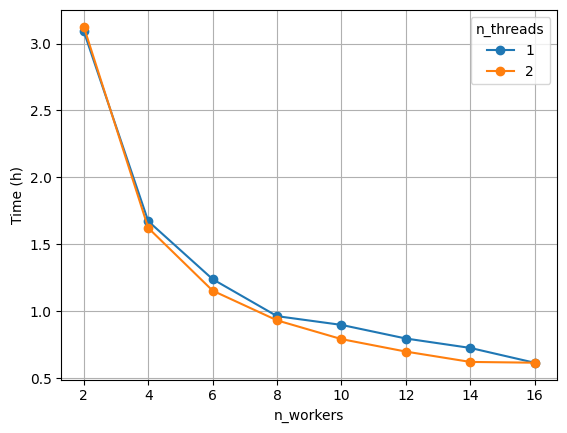

In [9]:
results.unstack().plot(marker='o')
plt.ylabel('Time (h)')
plt.grid();

In [10]:
results

n_workers  n_threads
16         1            0.613991
14         1            0.724941
12         1            0.795305
10         1            0.897027
8          1            0.962381
6          1            1.238670
4          1            1.672088
2          1            3.089819
16         2            0.614572
14         2            0.620402
12         2            0.697593
10         2            0.790808
8          2            0.930941
6          2            1.152858
4          2            1.621691
2          2            3.124948
Name: time, dtype: float64